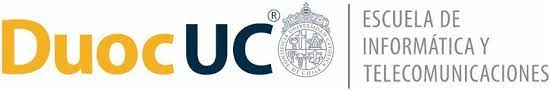

# Evaluación 2 - Etiquetado de Imágenes para Gobierno de Chile (Forma C)

Nombre Grupo: **Los Convolucionales**

Integrantes: 
*   **Cristóbal Cabezas Espinoza**
*   **Jorge López Soto**

Docente: Marco Antonio Japke Adriasola

Sección: DLY0100-003V

## 1. BUSSINESS UNDERSTANDING

El Gobierno de Chile requiere el desarrollo de etiquetado de imágenes para la implementación y aplicación de técnicas de inteligencia artificial en sus sitios web institucionales. Para dichos efectos se nos ha pedido desarrollar técnicas y modelos de aprendizaje para el etiquetado de imágenes a partir del dataset denominado CIFAR-10, el cual contiene un set de 50 mil imágenes a color (RGB) de tamaño 32 x 32, con el cual se aplicarán y entranarán modelos de aprendizaje automático. 

## 2. DATA UNDERSTANDING

In [102]:
# Importamos librerias
from tensorflow import keras
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [187]:
# Cargamos nuestro dataset, el cual lo importamos de la libreria de keras
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print('Datos de entrenamiento: ',imgs_train.shape)
print('Datos de prueba: ', imgs_test.shape)

Datos de entrenamiento:  (50000, 32, 32, 3)
Datos de prueba:  (10000, 32, 32, 3)


Nuestro dataset cuenta con 50000 imágenes, cada una de un tamaño de 32x32. 

In [3]:
# Con esta lista etiquetamos las clases de las imagenes
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

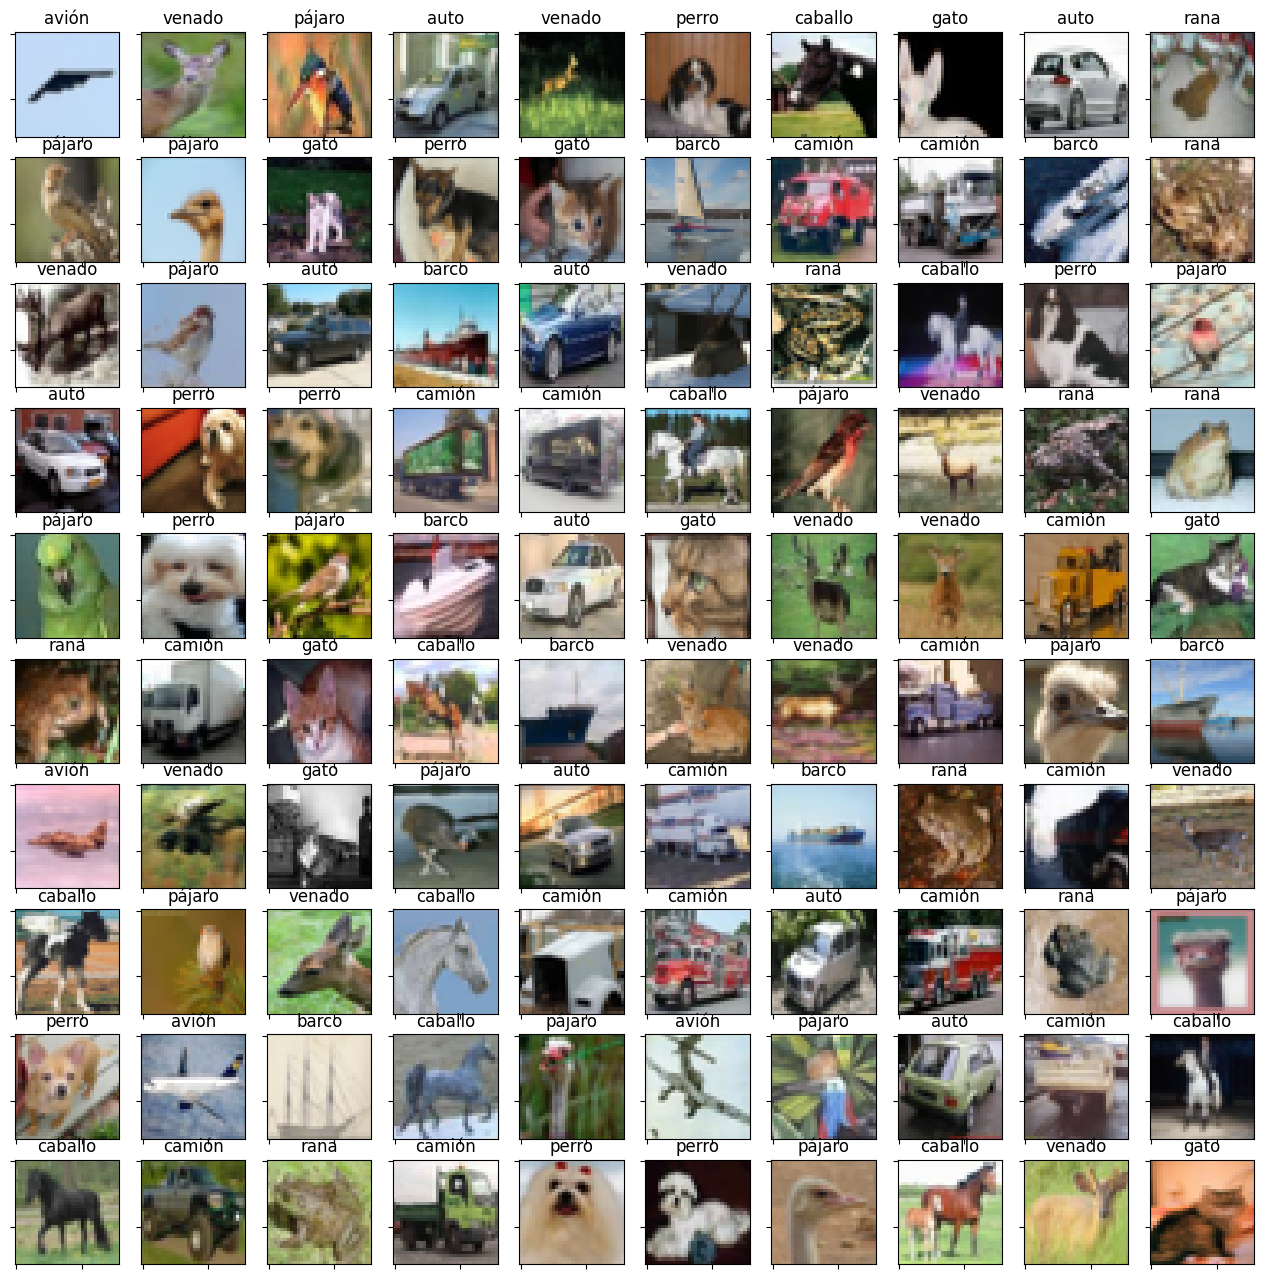

In [4]:
# Mostramos una grilla de ejemplos (al azar)

h = 10 # alto de la grilla
w = 10 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

## 3. DATA PREPARATION

In [5]:
# Tranformamos los datos para el entrenamiento,
# Necesitamos transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [6]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [7]:
# Setamos los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [8]:
# Fijamos cantidad de neuronas por cada capa (h)

h1 = 512
h2 = 256
h3 = 256

Para nuestro modelado, definiremos por defecto 3 capas ocultas (h), con 512, 256 y 256 neuronas, respectivamente.

## 4. MODELING

### 4.1. Implementación de Red Feed Fordward Fully Connected (MLP) 

A continuación se procederá a la implementación de nuestra Red MLP. La implementación se estructurará de la siguiente manera:

* Se probarán 3 optimizadores distintos: SGD, ADAM y RMSProps;
* A cada uno de estos tres se les aplicará tres funciones de activación: ReLu, Tanh y Sigmoid;
* En cada función de activación se entrenarán los datos aplicando 1, 2 y 3 capas ocultas (h).

Todos los modelos se entrenarán utilizando 50 epochs (épocas) a fin de obtener una muestra más bien extendida que refleje el desempeño del modelo a lo largo de variadas iteraciones.

#### 4.1.1. MODELO 1 - **SGD**

Con SGD (Stochastic Gradient Descent), se buscará actualizar los pesos de la red neuronal en dirección opuesta al gradiente de la función de pérdida con respecto a los pesos. Debido a su capacidad de aplicar una tasa de aprendizaje constante u basarse en lotes de ejemplos de entrenamiento, es eficiente y de ejecución rápida.

##### 4.1.1.1 *SGD - ReLu*

Con ReLu vamos a optimizar el flujo del gradiente, al resolver el problema de la desaparición de la misma. Esto nos permitirá un proceso más rápido y con buenos resultados en general. Según lo iremos viendo, ReLu tiene un 

###### 4.1.1.1.1. 1 Capa

In [37]:
# nuestra red feed-forward

model_sgd_relu_1 = keras.Sequential()
model_sgd_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_1 = model_sgd_relu_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1894 - loss: 2.2126 - val_accuracy: 0.2713 - val_loss: 2.0050
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2996 - loss: 1.9740 - val_accuracy: 0.3115 - val_loss: 1.9182
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3331 - loss: 1.9017 - val_accuracy: 0.3363 - val_loss: 1.8675
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3492 - loss: 1.8566 - val_accuracy: 0.3505 - val_loss: 1.8317
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3634 - loss: 1.8234 - val_accuracy: 0.3636 - val_loss: 1.8025
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3729 - loss: 1.7960 - val_accuracy: 0.3747 - val_loss: 1.7780
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3820 - loss: 1.7724 - val_accuracy: 0.3842 - val_loss: 1.7558
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3902 - loss: 1.7513 - val_accu

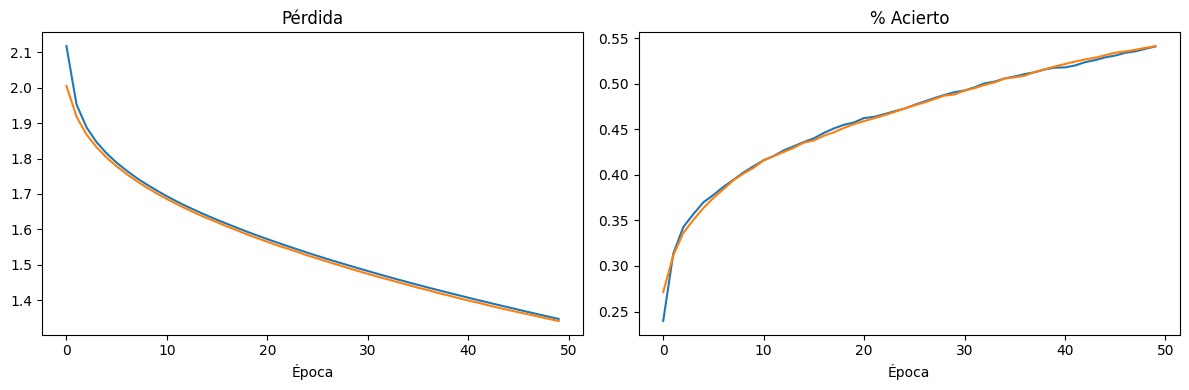

In [39]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_1.history['accuracy'])
plt.plot(h_sgd_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_1.history['loss'])
plt.plot(h_sgd_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.1.2. 2 Capas

In [40]:
# nuestra red feed-forward

model_sgd_relu_2 = keras.Sequential()
model_sgd_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_2 = model_sgd_relu_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1865 - loss: 2.2150 - val_accuracy: 0.2678 - val_loss: 2.0299
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2974 - loss: 1.9998 - val_accuracy: 0.3074 - val_loss: 1.9358
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3253 - loss: 1.9195 - val_accuracy: 0.3322 - val_loss: 1.8779
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3490 - loss: 1.8686 - val_accuracy: 0.3514 - val_loss: 1.8359
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3659 - loss: 1.8305 - val_accuracy: 0.3650 - val_loss: 1.8028
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3774 - loss: 1.7989 - val_accuracy: 0.3745 - val_loss: 1.7746
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3876 - loss: 1.7712 - val_accuracy: 0.3840 - val_loss: 1.7496
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3981 - loss: 1.7466 - val_accu

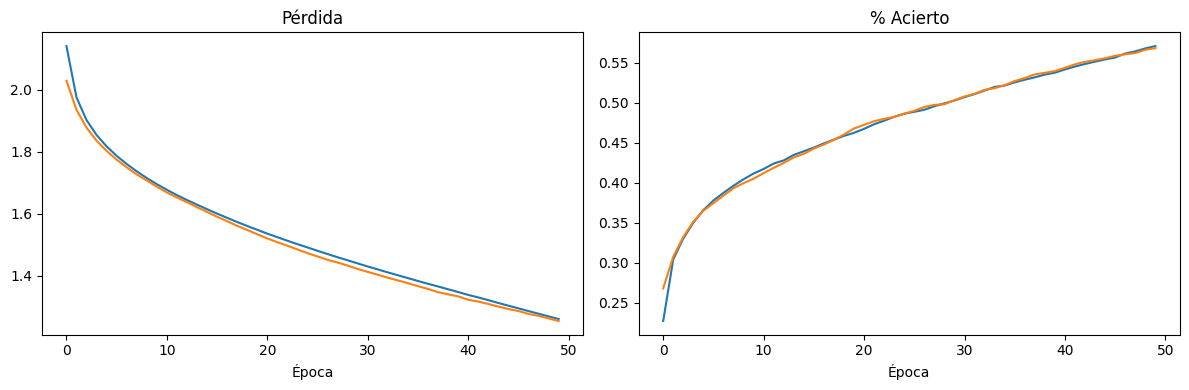

In [42]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_2.history['accuracy'])
plt.plot(h_sgd_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_2.history['loss'])
plt.plot(h_sgd_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.1.3. 3 Capas

In [43]:
# nuestra red feed-forward

model_sgd_relu_3 = keras.Sequential()
model_sgd_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_sgd_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_3.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_3 = model_sgd_relu_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1676 - loss: 2.2343 - val_accuracy: 0.2714 - val_loss: 2.0493
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2871 - loss: 2.0220 - val_accuracy: 0.3075 - val_loss: 1.9423
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3164 - loss: 1.9323 - val_accuracy: 0.3307 - val_loss: 1.8813
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3356 - loss: 1.8802 - val_accuracy: 0.3474 - val_loss: 1.8393
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3521 - loss: 1.8414 - val_accuracy: 0.3580 - val_loss: 1.8068
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3657 - loss: 1.8092 - val_accuracy: 0.3704 - val_loss: 1.7785
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3765 - loss: 1.7810 - val_accuracy: 0.3809 - val_loss: 1.7516
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3857 - loss: 1.7555 - val_accu

#### 4.1.1.2. *SGD - Tanh*

###### 4.1.1.2.1. 1 Capa

In [46]:
model_sgd_tanh_1 = keras.Sequential()
model_sgd_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_1 = model_sgd_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1937 - loss: 2.2044 - val_accuracy: 0.2796 - val_loss: 1.9918
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3081 - loss: 1.9640 - val_accuracy: 0.3187 - val_loss: 1.9091
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3398 - loss: 1.8936 - val_accuracy: 0.3400 - val_loss: 1.8634
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3553 - loss: 1.8522 - val_accuracy: 0.3526 - val_loss: 1.8318
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3683 - loss: 1.8227 - val_accuracy: 0.3653 - val_loss: 1.8073
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3819 - loss: 1.7996 - val_accuracy: 0.3738 - val_loss: 1.7871
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3870 - loss: 1.7803 - val_accuracy: 0.3787 - val_loss: 1.7698
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3943 - loss: 1.7636 - val_accu

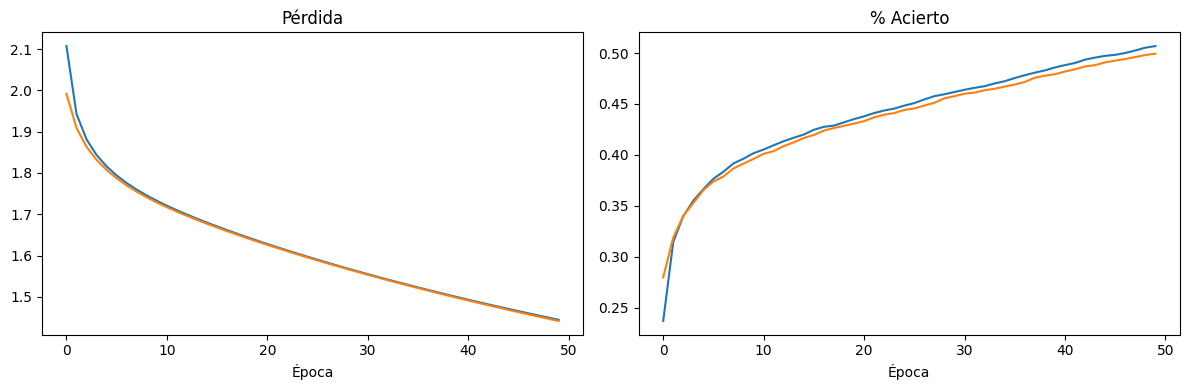

In [48]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_1.history['accuracy'])
plt.plot(h_sgd_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_1.history['loss'])
plt.plot(h_sgd_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.2.2. 2 Capas

In [49]:
model_sgd_tanh_2 = keras.Sequential()
model_sgd_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_2 = model_sgd_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1790 - loss: 2.2286 - val_accuracy: 0.2729 - val_loss: 2.0031
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3012 - loss: 1.9702 - val_accuracy: 0.3243 - val_loss: 1.9024
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3379 - loss: 1.8883 - val_accuracy: 0.3461 - val_loss: 1.8469
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3566 - loss: 1.8402 - val_accuracy: 0.3622 - val_loss: 1.8092
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3734 - loss: 1.8061 - val_accuracy: 0.3757 - val_loss: 1.7806
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3819 - loss: 1.7795 - val_accuracy: 0.3839 - val_loss: 1.7572
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3921 - loss: 1.7574 - val_accuracy: 0.3903 - val_loss: 1.7371
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3997 - loss: 1.7382 - val_accu

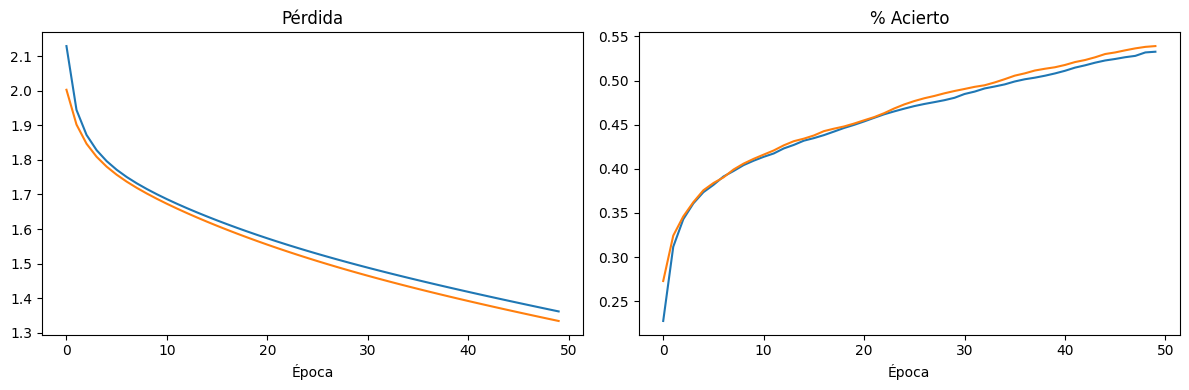

In [51]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_2.history['accuracy'])
plt.plot(h_sgd_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_2.history['loss'])
plt.plot(h_sgd_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.2.3. 3 Capas

In [52]:
# nuestra red feed-forward

model_sgd_tanh_3 = keras.Sequential()
model_sgd_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_sgd_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_3.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#sgd=SGD(learning_rate=0.01)
model_sgd_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_3 = model_sgd_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.1938 - loss: 2.2069 - val_accuracy: 0.2736 - val_loss: 1.9896
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3110 - loss: 1.9566 - val_accuracy: 0.3191 - val_loss: 1.8951
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3410 - loss: 1.8798 - val_accuracy: 0.3423 - val_loss: 1.8429
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3576 - loss: 1.8334 - val_accuracy: 0.3578 - val_loss: 1.8061
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3687 - loss: 1.7996 - val_accuracy: 0.3692 - val_loss: 1.7769
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3846 - loss: 1.7726 - val_accuracy: 0.3778 - val_loss: 1.7524
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3911 - loss: 1.7501 - val_accuracy: 0.3860 - val_loss: 1.7310
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4007 - loss: 1.7306 - val_accu

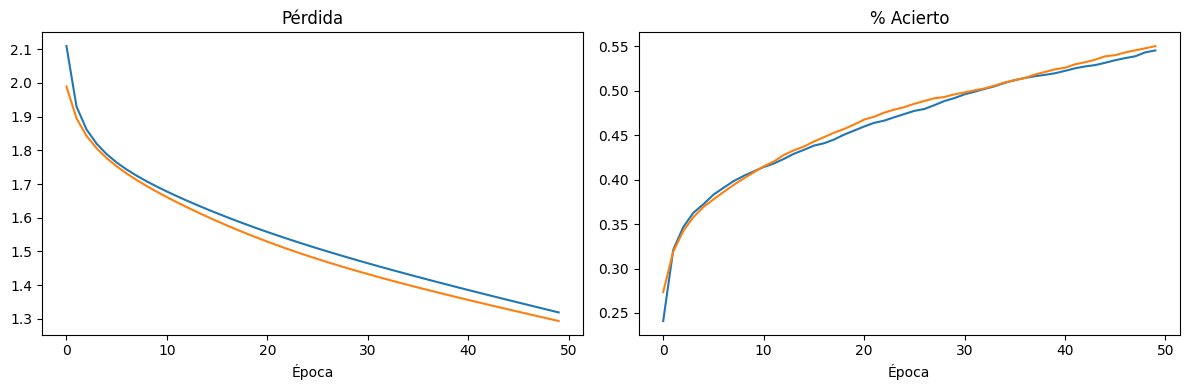

In [54]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_3.history['accuracy'])
plt.plot(h_sgd_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_3.history['loss'])
plt.plot(h_sgd_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.1.3. *SGD - Sigmoid*

###### 4.1.1.3.1. 1 Capa

In [64]:
model_sgd_sigmoid_1 = keras.Sequential()
model_sgd_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_1.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
sgd=SGD(learning_rate=0.01)
model_sgd_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

h_sgd_sigmoid_1 = model_sgd_sigmoid_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1298 - loss: 2.3139 - val_accuracy: 0.2011 - val_loss: 2.2173
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2232 - loss: 2.1987 - val_accuracy: 0.2389 - val_loss: 2.1516
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2667 - loss: 2.1382 - val_accuracy: 0.2706 - val_loss: 2.1037
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2872 - loss: 2.0935 - val_accuracy: 0.2879 - val_loss: 2.0665
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2970 - loss: 2.0586 - val_accuracy: 0.3001 - val_loss: 2.0366
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3054 - loss: 2.0304 - val_accuracy: 0.3096 - val_loss: 2.0117
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3103 - loss: 2.0069 - val_accuracy: 0.3162 - val_loss: 1.9906
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3193 - loss: 1.9869 - val_accu

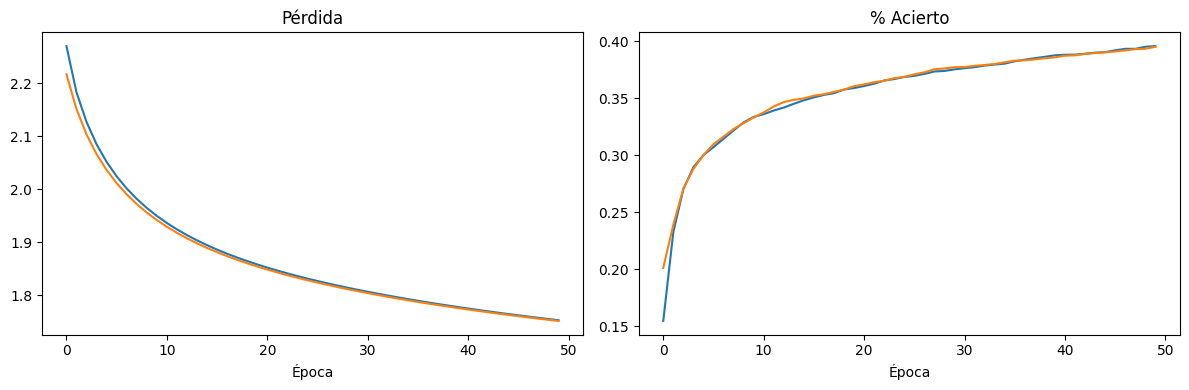

In [66]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_1.history['accuracy'])
plt.plot(h_sgd_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_1.history['loss'])
plt.plot(h_sgd_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.3.2. 2 Capas

In [67]:
model_sgd_sigmoid_2 = keras.Sequential()
model_sgd_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_2.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model_sgd_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_sigmoid_2 = model_sgd_sigmoid_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1048 - loss: 2.4207 - val_accuracy: 0.1251 - val_loss: 2.2947
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1340 - loss: 2.2932 - val_accuracy: 0.1592 - val_loss: 2.2841
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1627 - loss: 2.2826 - val_accuracy: 0.1828 - val_loss: 2.2737
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1824 - loss: 2.2724 - val_accuracy: 0.2021 - val_loss: 2.2636
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1972 - loss: 2.2622 - val_accuracy: 0.2155 - val_loss: 2.2534
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2073 - loss: 2.2521 - val_accuracy: 0.2276 - val_loss: 2.2432
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2197 - loss: 2.2419 - val_accuracy: 0.2373 - val_loss: 2.2328
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2280 - loss: 2.2316 - val_accu

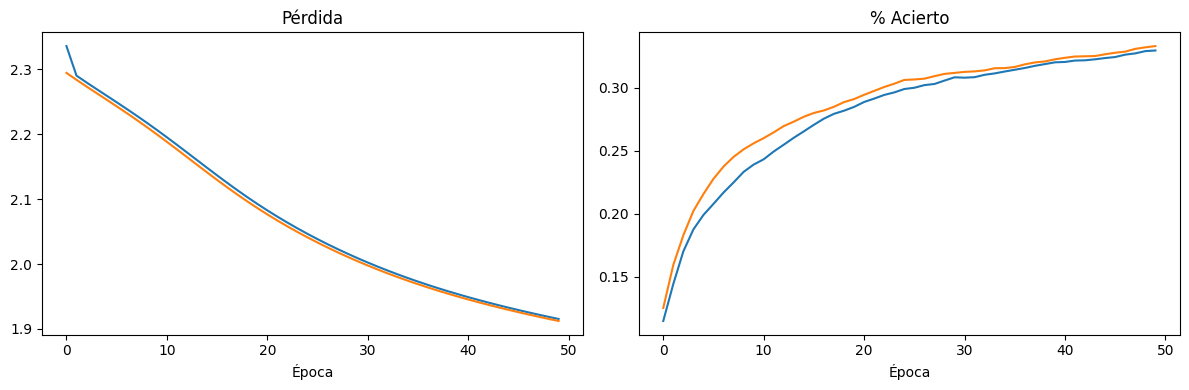

In [69]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_2.history['accuracy'])
plt.plot(h_sgd_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_2.history['loss'])
plt.plot(h_sgd_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.1.3.3. 3 Capas

In [70]:
# nuestra red feed-forward

model_sgd_sigmoid_3 = keras.Sequential()
model_sgd_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_sgd_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_sgd_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_3.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model_sgd_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_sigmoid_3 = model_sgd_sigmoid_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1024 - loss: 2.3176 - val_accuracy: 0.1043 - val_loss: 2.3035
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1049 - loss: 2.3043 - val_accuracy: 0.1082 - val_loss: 2.3027
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1064 - loss: 2.3035 - val_accuracy: 0.1163 - val_loss: 2.3020
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1084 - loss: 2.3028 - val_accuracy: 0.1258 - val_loss: 2.3012
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1117 - loss: 2.3020 - val_accuracy: 0.1320 - val_loss: 2.3004
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1146 - loss: 2.3013 - val_accuracy: 0.1371 - val_loss: 2.2997
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1166 - loss: 2.3005 - val_accuracy: 0.1403 - val_loss: 2.2989
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1187 - loss: 2.2997 - val_accu

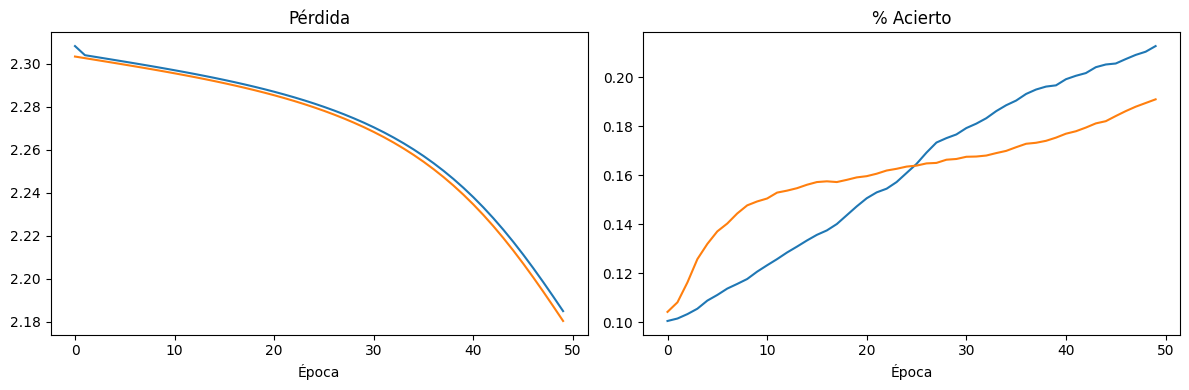

In [72]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_3.history['accuracy'])
plt.plot(h_sgd_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_3.history['loss'])
plt.plot(h_sgd_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.2. MODELO 2 - **ADAM**

Mediante la aplicación de Adaptive Moment Estimation (Adam), se calculará adaptativamente tasas de aprendizaje individuales para diferentes parámetros a partir de estimaciones de primer y segundo momento de los gradientes.

##### *4.1.2.1. ADAM - ReLu*

###### 4.1.2.1.1. 1 Capa

In [73]:
model_adam_relu_1 = keras.Sequential()
model_adam_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_1.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_1 = model_adam_relu_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1709 - loss: 3.1296 - val_accuracy: 0.3055 - val_loss: 1.9749
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3088 - loss: 1.9514 - val_accuracy: 0.3369 - val_loss: 1.8849
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3331 - loss: 1.8779 - val_accuracy: 0.3587 - val_loss: 1.8313
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3622 - loss: 1.8166 - val_accuracy: 0.3743 - val_loss: 1.7873
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3846 - loss: 1.7693 - val_accuracy: 0.3969 - val_loss: 1.7406
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3972 - loss: 1.7305 - val_accuracy: 0.4015 - val_loss: 1.7099
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4048 - loss: 1.7037 - val_accuracy: 0.4225 - val_loss: 1.6564
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.4211 - loss: 1.6633 - val_accu

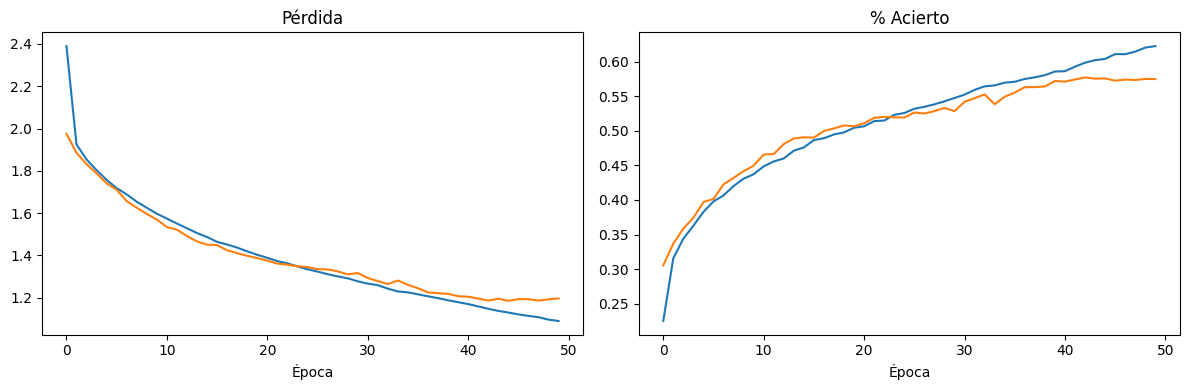

In [75]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_1.history['accuracy'])
plt.plot(h_adam_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_1.history['loss'])
plt.plot(h_adam_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.1.2. 2 Capas

In [76]:
model_adam_relu_2 = keras.Sequential()
model_adam_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_2.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_2 = model_adam_relu_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.1812 - loss: 2.6321 - val_accuracy: 0.2946 - val_loss: 1.9449
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3062 - loss: 1.9264 - val_accuracy: 0.3560 - val_loss: 1.8180
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3494 - loss: 1.8242 - val_accuracy: 0.3719 - val_loss: 1.7498
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3805 - loss: 1.7549 - val_accuracy: 0.3748 - val_loss: 1.7563
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3875 - loss: 1.7188 - val_accuracy: 0.3970 - val_loss: 1.6856
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4045 - loss: 1.6714 - val_accuracy: 0.4204 - val_loss: 1.6230
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4183 - loss: 1.6305 - val_accuracy: 0.4439 - val_loss: 1.5780
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4305 - loss: 1.5977 - val_accu

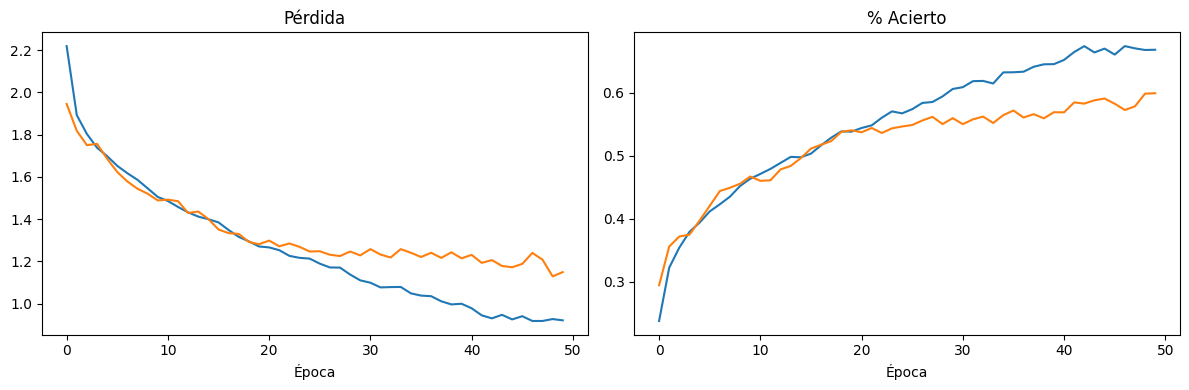

In [78]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_2.history['accuracy'])
plt.plot(h_adam_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_2.history['loss'])
plt.plot(h_adam_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.1.3. 3 Capas

In [79]:
# nuestra red feed-forward

model_adam_relu_3 = keras.Sequential()
model_adam_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_adam_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_3.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_relu_3 = model_adam_relu_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1723 - loss: 2.3695 - val_accuracy: 0.2956 - val_loss: 1.9223
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3065 - loss: 1.9124 - val_accuracy: 0.3519 - val_loss: 1.7956
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3470 - loss: 1.8204 - val_accuracy: 0.3785 - val_loss: 1.7306
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3772 - loss: 1.7504 - val_accuracy: 0.3863 - val_loss: 1.7087
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3884 - loss: 1.7125 - val_accuracy: 0.4232 - val_loss: 1.6200
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4106 - loss: 1.6489 - val_accuracy: 0.4206 - val_loss: 1.6197
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4284 - loss: 1.6085 - val_accuracy: 0.4292 - val_loss: 1.6052
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4399 - loss: 1.5674 - val_accu

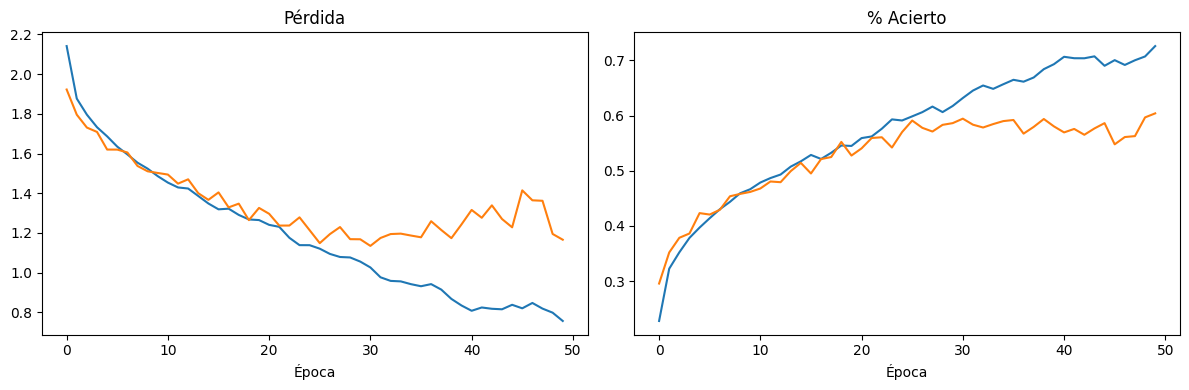

In [81]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_3.history['accuracy'])
plt.plot(h_adam_relu_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_3.history['loss'])
plt.plot(h_adam_relu_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.2.2. *ADAM - Tanh*

###### 4.1.2.2.1. 1 Capa

In [82]:

model_adam_tanh_1 = keras.Sequential()
model_adam_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_1.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_1 = model_adam_tanh_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1580 - loss: 3.5423 - val_accuracy: 0.2886 - val_loss: 2.0022
Epoch 2/50
 59/100 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2787 - loss: 1.9930

100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2813 - loss: 1.9782 - val_accuracy: 0.3157 - val_loss: 1.8946
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.3291 - loss: 1.8850 - val_accuracy: 0.3323 - val_loss: 1.8554
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3424 - loss: 1.8392 - val_accuracy: 0.3583 - val_loss: 1.8058
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3538 - loss: 1.8081 - val_accuracy: 0.3599 - val_loss: 1.7870
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3701 - loss: 1.7772 - val_accuracy: 0.3782 - val_loss: 1.7633
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3774 - loss: 1.7501 - val_accuracy: 0.3827 - val_loss: 1.7603
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3889 - loss: 1.7342 - val_accuracy: 0.3755 - val_loss: 1.7473
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3926 - loss: 1.7130 - val_accuracy: 0.391

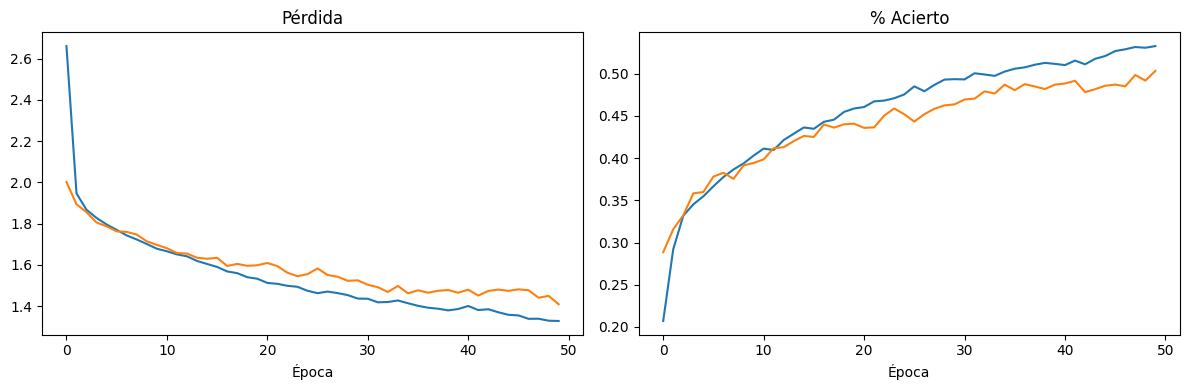

In [84]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_1.history['accuracy'])
plt.plot(h_adam_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_1.history['loss'])
plt.plot(h_adam_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.2.2. 2 Capas

In [85]:
model_adam_tanh_2 = keras.Sequential()
model_adam_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_2.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [86]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_2 = model_adam_tanh_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1369 - loss: 2.8367 - val_accuracy: 0.2421 - val_loss: 2.0302
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.2597 - loss: 2.0118 - val_accuracy: 0.3073 - val_loss: 1.8940
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3148 - loss: 1.9037 - val_accuracy: 0.3524 - val_loss: 1.8252
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3374 - loss: 1.8495 - val_accuracy: 0.3642 - val_loss: 1.7910
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3526 - loss: 1.8023 - val_accuracy: 0.3733 - val_loss: 1.7749
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3626 - loss: 1.7793 - val_accuracy: 0.3826 - val_loss: 1.7349
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3739 - loss: 1.7393 - val_accuracy: 0.3904 - val_loss: 1.7090
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3845 - loss: 1.7199 - val_accu

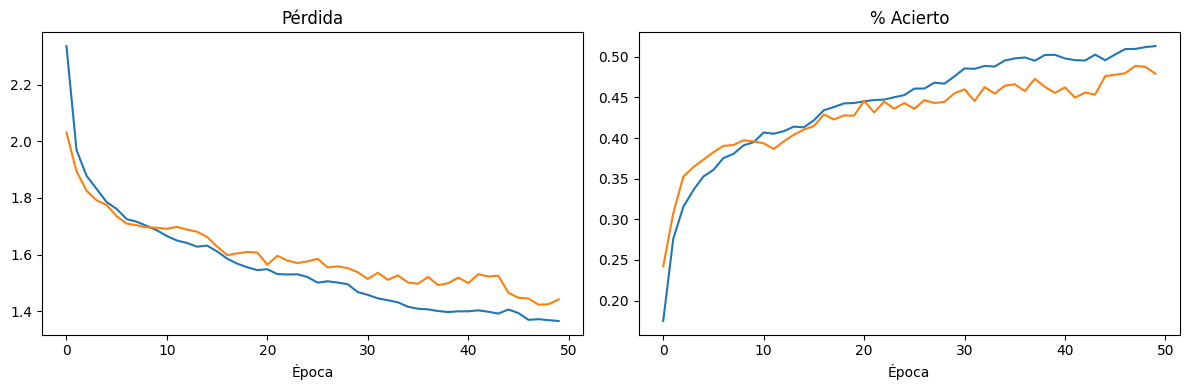

In [87]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_2.history['accuracy'])
plt.plot(h_adam_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_2.history['loss'])
plt.plot(h_adam_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.2.3. 3 Capas

In [88]:
# nuestra red feed-forward

model_adam_tanh_3 = keras.Sequential()
model_adam_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_adam_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_adam_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_3.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_tanh_3 = model_adam_tanh_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.1420 - loss: 2.5090 - val_accuracy: 0.2393 - val_loss: 2.0257
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2497 - loss: 2.0149 - val_accuracy: 0.2890 - val_loss: 1.9067
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.2873 - loss: 1.9450 - val_accuracy: 0.2961 - val_loss: 1.8843
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3002 - loss: 1.9045 - val_accuracy: 0.3278 - val_loss: 1.8379
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3169 - loss: 1.8847 - val_accuracy: 0.3439 - val_loss: 1.8142
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3246 - loss: 1.8484 - val_accuracy: 0.3611 - val_loss: 1.7548
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3364 - loss: 1.8072 - val_accuracy: 0.3629 - val_loss: 1.7547
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3513 - loss: 1.7841 - val_accu

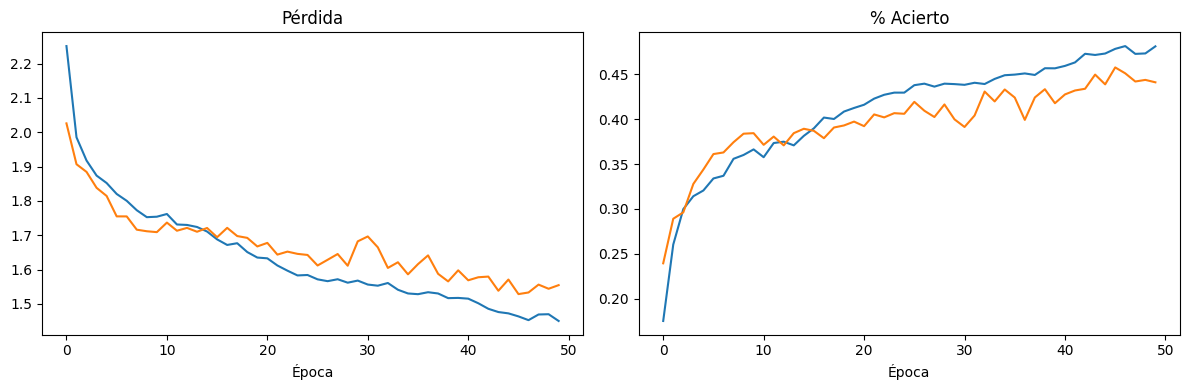

In [90]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_3.history['accuracy'])
plt.plot(h_adam_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_3.history['loss'])
plt.plot(h_adam_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.2.3. *ADAM - Sigmoid*

###### 4.1.2.3.1. 1 Capa

In [91]:
# nuestra red feed-forward

model_adam_sigmoid_1 = keras.Sequential()
model_adam_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [92]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_1 = model_adam_sigmoid_1.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1926 - loss: 2.3808 - val_accuracy: 0.3184 - val_loss: 1.9002
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3304 - loss: 1.8792 - val_accuracy: 0.3529 - val_loss: 1.8097
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.3683 - loss: 1.7969 - val_accuracy: 0.3772 - val_loss: 1.7509
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.3863 - loss: 1.7409 - val_accuracy: 0.3980 - val_loss: 1.7033
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4020 - loss: 1.6940 - val_accuracy: 0.4149 - val_loss: 1.6624
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4203 - loss: 1.6533 - val_accuracy: 0.4293 - val_loss: 1.6225
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4380 - loss: 1.6164 - val_accuracy: 0.4398 - val_loss: 1.5943
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.4514 - loss: 1.5820 - val_accu

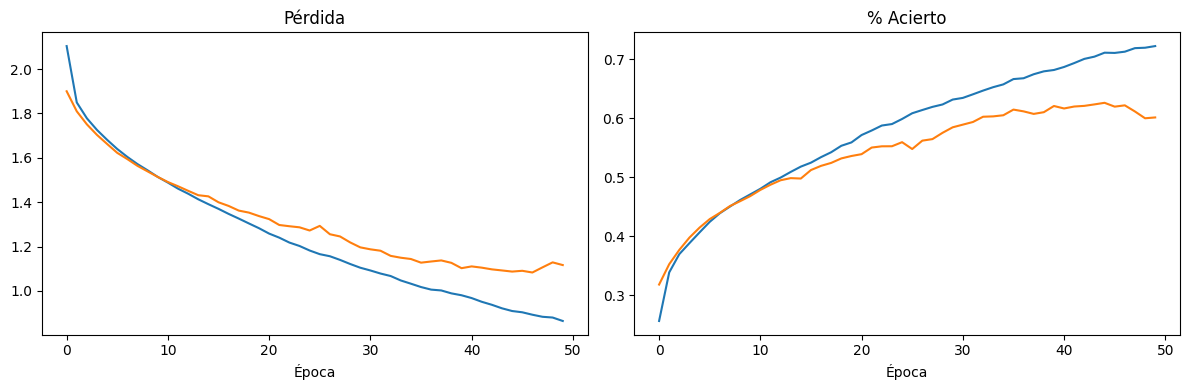

In [93]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_1.history['accuracy'])
plt.plot(h_adam_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_1.history['loss'])
plt.plot(h_adam_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.3.2. 2 Capas

In [94]:
# nuestra red feed-forward

model_adam_sigmoid_2 = keras.Sequential()
model_adam_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_2 = model_adam_sigmoid_2.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1794 - loss: 2.2177 - val_accuracy: 0.3255 - val_loss: 1.8971
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3147 - loss: 1.8977 - val_accuracy: 0.3536 - val_loss: 1.8000
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3558 - loss: 1.8152 - val_accuracy: 0.3747 - val_loss: 1.7435
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3779 - loss: 1.7503 - val_accuracy: 0.3943 - val_loss: 1.7061
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.3942 - loss: 1.6957 - val_accuracy: 0.4106 - val_loss: 1.6867
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4120 - loss: 1.6493 - val_accuracy: 0.4167 - val_loss: 1.6572
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.4295 - loss: 1.6064 - val_accuracy: 0.4224 - val_loss: 1.6376
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.4444 - loss: 1.5690 - val_accu

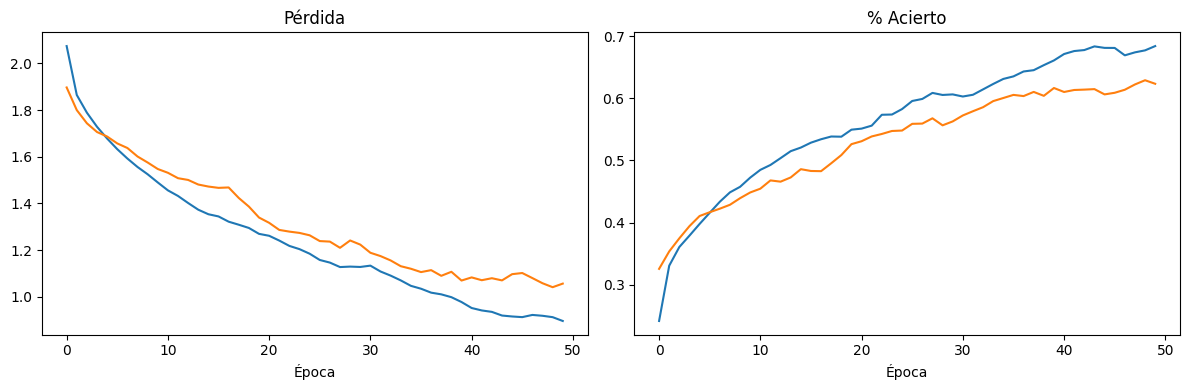

In [96]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_2.history['accuracy'])
plt.plot(h_adam_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_2.history['loss'])
plt.plot(h_adam_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.2.3.3. 3 Capas

In [97]:
# nuestra red feed-forward

model_adam_sigmoid_3 = keras.Sequential()
model_adam_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_adam_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_3.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
adam=Adam(learning_rate=0.001,weight_decay=1e-6, use_ema=True, ema_momentum=0.99)
model_adam_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=['accuracy']
)

h_adam_sigmoid_3 = model_adam_sigmoid_3.fit(X_test,Y_test,
        epochs=50,
        batch_size=100,
        validation_data=(X_test,Y_test)
    )

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1315 - loss: 2.2749 - val_accuracy: 0.2587 - val_loss: 2.0053
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2658 - loss: 1.9880 - val_accuracy: 0.3091 - val_loss: 1.8873
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3087 - loss: 1.9052 - val_accuracy: 0.3365 - val_loss: 1.8233
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3384 - loss: 1.8348 - val_accuracy: 0.3600 - val_loss: 1.7547
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3601 - loss: 1.7724 - val_accuracy: 0.3735 - val_loss: 1.7208
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3788 - loss: 1.7289 - val_accuracy: 0.3881 - val_loss: 1.6863
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3905 - loss: 1.6935 - val_accuracy: 0.3920 - val_loss: 1.6692
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3987 - loss: 1.6642 - val_accu

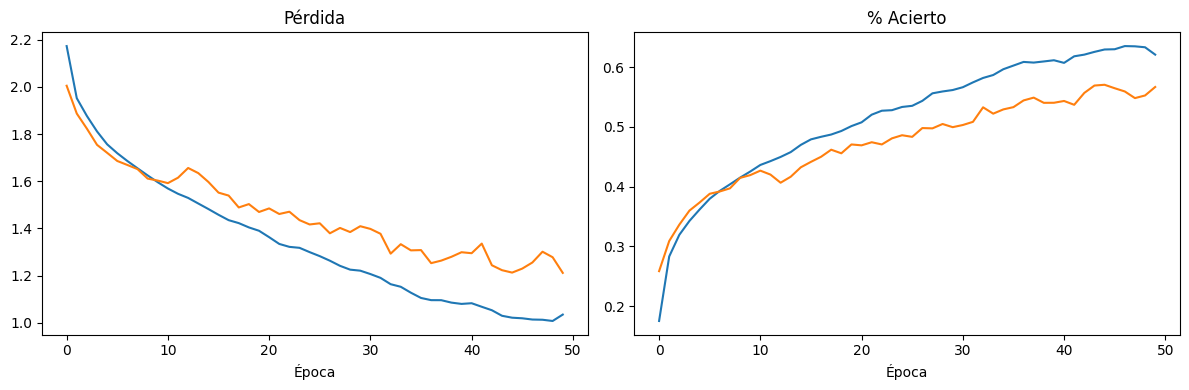

In [99]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_3.history['accuracy'])
plt.plot(h_adam_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_3.history['loss'])
plt.plot(h_adam_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.3. MODELO 4 - **RMsProp**

##### 4.1.3.1. RMsProp + ReLu

###### 4.1.3.1.1. 1 Capa

In [103]:
model_rmsprop_relu_1 = keras.Sequential()
model_rmsprop_relu_1.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_1.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [105]:
model_rmsprop_relu_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_relu_1 = model_rmsprop_relu_1.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3899 - loss: 1.7920 - val_accuracy: 0.3743 - val_loss: 1.7236
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4205 - loss: 1.6490 - val_accuracy: 0.3836 - val_loss: 1.7214
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4196 - loss: 1.6327 - val_accuracy: 0.4007 - val_loss: 1.6638
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4337 - loss: 1.6036 - val_accuracy: 0.4229 - val_loss: 1.5995
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4431 - loss: 1.5866 - val_accuracy: 0.4293 - val_loss: 1.5798
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4501 - loss: 1.5641 - val_accuracy: 0.4575 - val_loss: 1.5206
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4511 - loss: 1.5506 - val_accuracy: 0.4607 - val_loss: 1.4979
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4612 - loss: 1.5271 - val_accu

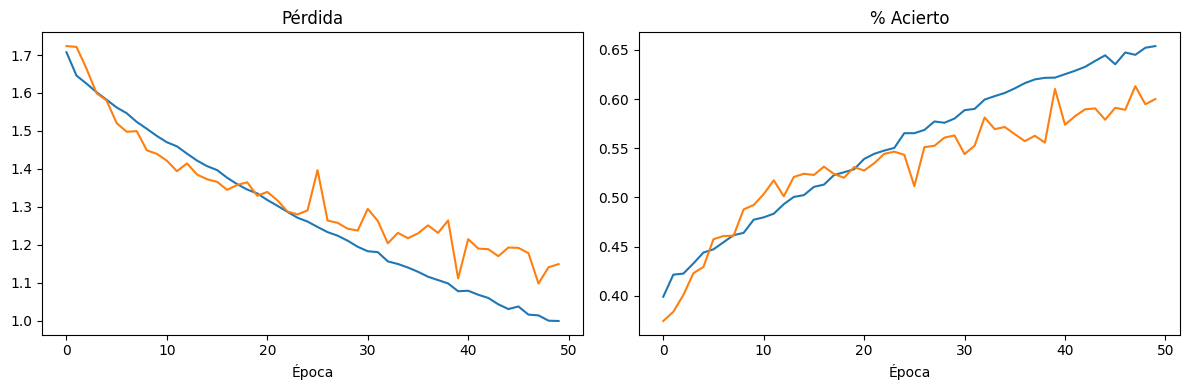

In [106]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_1.history['accuracy'])
plt.plot(h_rmsprop_relu_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_1.history['loss'])
plt.plot(h_rmsprop_relu_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.1.2. 2 Capas

In [123]:
model_rmsprop_relu_2 = keras.Sequential()
model_rmsprop_relu_2.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_2.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_rmsprop_relu_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_2.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model_rmsprop_relu_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_relu_2 = model_rmsprop_relu_2.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1349 - loss: 3.2862 - val_accuracy: 0.2211 - val_loss: 2.0581
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2547 - loss: 2.0451 - val_accuracy: 0.2831 - val_loss: 1.9371
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3021 - loss: 1.9369 - val_accuracy: 0.3183 - val_loss: 1.8665
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3342 - loss: 1.8498 - val_accuracy: 0.3143 - val_loss: 1.8873
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3541 - loss: 1.7945 - val_accuracy: 0.3732 - val_loss: 1.7305
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3723 - loss: 1.7585 - val_accuracy: 0.3565 - val_loss: 1.7783
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3868 - loss: 1.7143 - val_accuracy: 0.3586 - val_loss: 1.7829
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4023 - loss: 1.6789 - val_accu

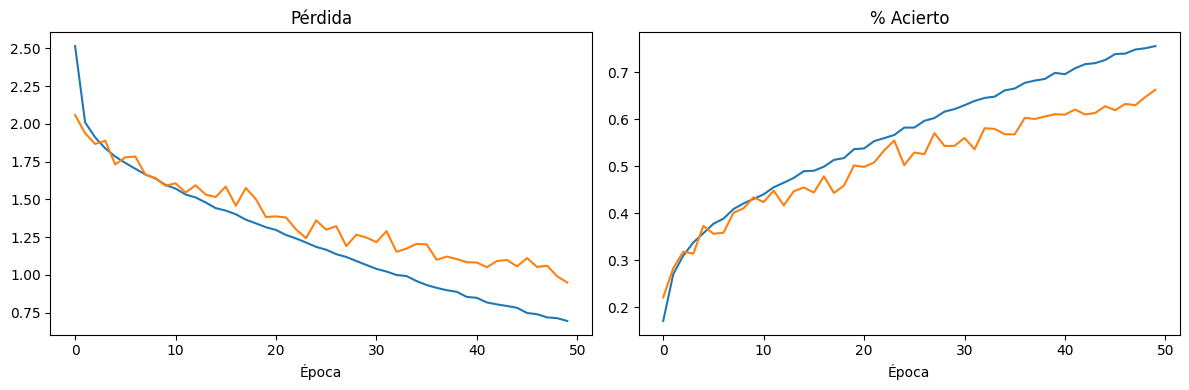

In [125]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_2.history['accuracy'])
plt.plot(h_rmsprop_relu_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_2.history['loss'])
plt.plot(h_rmsprop_relu_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.1.3. 3 Capas

In [ ]:
model_rmsprop_relu_3 = keras.Sequential()
model_rmsprop_relu_3.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_3.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_rmsprop_relu_3.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_rmsprop_relu_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_3.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model_rmsprop_relu_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_relu_3 = model_rmsprop_relu_3.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3528 - loss: 1.8649 - val_accuracy: 0.3335 - val_loss: 1.8461
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3850 - loss: 1.7117 - val_accuracy: 0.3742 - val_loss: 1.7337
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3980 - loss: 1.6803 - val_accuracy: 0.3824 - val_loss: 1.6960
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4160 - loss: 1.6459 - val_accuracy: 0.4283 - val_loss: 1.5691
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4269 - loss: 1.5938 - val_accuracy: 0.4443 - val_loss: 1.5215
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.4452 - loss: 1.5722 - val_accuracy: 0.4258 - val_loss: 1.5818
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4526 - loss: 1.5245 - val_accuracy: 0.4000 - val_loss: 1.7350
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4732 - loss: 1.5002 - val_accu

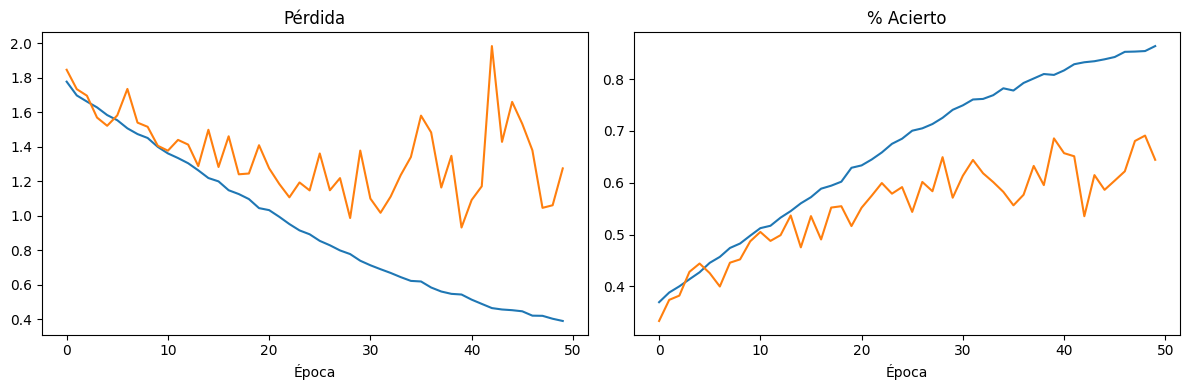

In [113]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_3.history['accuracy'])
plt.plot(h_rmsprop_relu_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_3.history['loss'])
plt.plot(h_rmsprop_relu_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### *4.1.3.2. RMsProp - Tanh*

###### 4.1.3.2.1. 1 Capa

In [114]:
model_rmsprop_tanh_1 = keras.Sequential()
model_rmsprop_tanh_1.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_1.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
model_rmsprop_tanh_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_tanh_1 = model_rmsprop_tanh_1.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1399 - loss: 3.5252 - val_accuracy: 0.1892 - val_loss: 2.0999
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2200 - loss: 2.1176 - val_accuracy: 0.2297 - val_loss: 2.0506
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2638 - loss: 2.0408 - val_accuracy: 0.2635 - val_loss: 1.9698
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2872 - loss: 1.9722 - val_accuracy: 0.2717 - val_loss: 2.0150
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3029 - loss: 1.9404 - val_accuracy: 0.2869 - val_loss: 1.9337
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3196 - loss: 1.8860 - val_accuracy: 0.3053 - val_loss: 1.8942
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3306 - loss: 1.8643 - val_accuracy: 0.3327 - val_loss: 1.8240
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3461 - loss: 1.8204 - val_accu

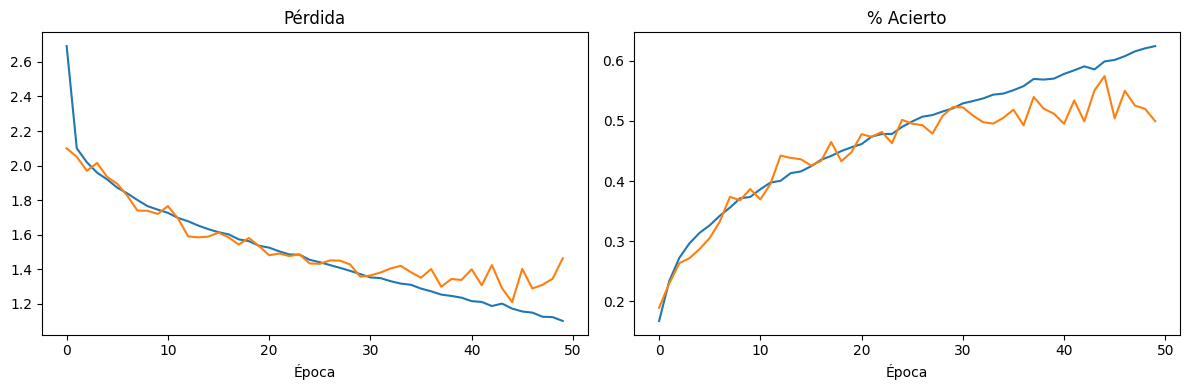

In [116]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_1.history['accuracy'])
plt.plot(h_rmsprop_tanh_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_1.history['loss'])
plt.plot(h_rmsprop_tanh_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.2.2. 2 Capas

In [117]:
model_rmsprop_tanh_2 = keras.Sequential()
model_rmsprop_tanh_2.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_2.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_rmsprop_tanh_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_2.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model_rmsprop_tanh_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_tanh_2 = model_rmsprop_tanh_2.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1081 - loss: 2.8156 - val_accuracy: 0.1426 - val_loss: 2.2469
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1856 - loss: 2.1682 - val_accuracy: 0.1650 - val_loss: 2.1916
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2351 - loss: 2.0764 - val_accuracy: 0.2154 - val_loss: 2.0491
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2642 - loss: 2.0173 - val_accuracy: 0.2557 - val_loss: 2.0353
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2878 - loss: 1.9691 - val_accuracy: 0.2786 - val_loss: 1.9712
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3095 - loss: 1.9102 - val_accuracy: 0.3296 - val_loss: 1.8323
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3234 - loss: 1.8759 - val_accuracy: 0.3002 - val_loss: 1.8914
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3375 - loss: 1.8263 - val_accu

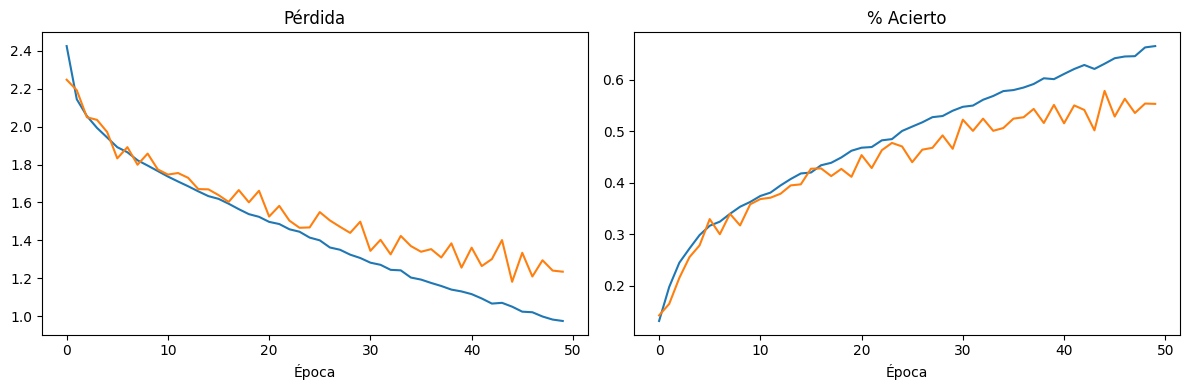

In [119]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_2.history['accuracy'])
plt.plot(h_rmsprop_tanh_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_2.history['loss'])
plt.plot(h_rmsprop_tanh_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.2.3. 3 Capas

In [120]:
model_rmsprop_tanh_3 = keras.Sequential()
model_rmsprop_tanh_3.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_3.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_rmsprop_tanh_3.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_rmsprop_tanh_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_3.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [121]:
model_rmsprop_tanh_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_tanh_3 = model_rmsprop_tanh_3.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1061 - loss: 2.6395 - val_accuracy: 0.1374 - val_loss: 2.3178
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1701 - loss: 2.2018 - val_accuracy: 0.1292 - val_loss: 2.3022
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2072 - loss: 2.1108 - val_accuracy: 0.1837 - val_loss: 2.1248
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.2472 - loss: 2.0481 - val_accuracy: 0.2881 - val_loss: 1.9752
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2702 - loss: 2.0109 - val_accuracy: 0.2925 - val_loss: 1.9287
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2931 - loss: 1.9533 - val_accuracy: 0.2716 - val_loss: 2.1283
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3070 - loss: 1.9105 - val_accuracy: 0.3108 - val_loss: 1.8894
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3140 - loss: 1.8803 - val_accu

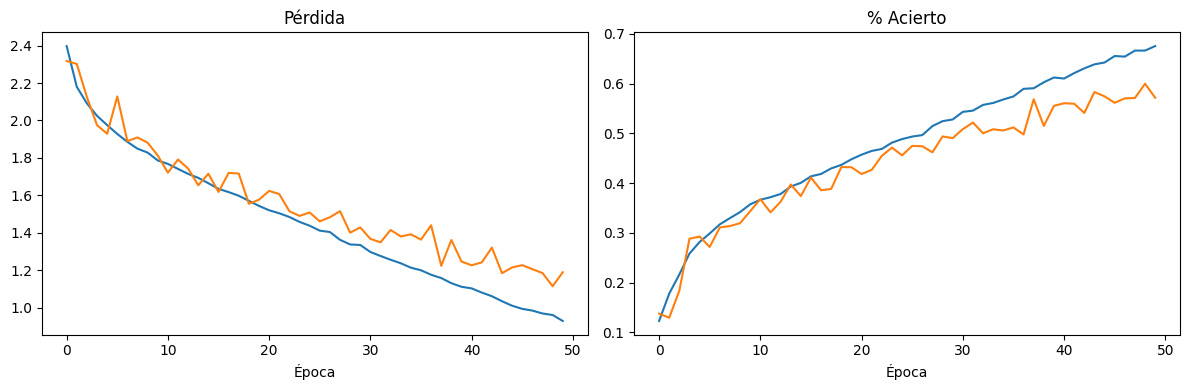

In [122]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_3.history['accuracy'])
plt.plot(h_rmsprop_tanh_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_3.history['loss'])
plt.plot(h_rmsprop_tanh_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.1.3.3. *RMsProp - Sigmoid*

###### 4.1.3.3.1. 1 Capa

In [140]:
model_rmsprop_sigmoid_1 = keras.Sequential()
model_rmsprop_sigmoid_1.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_1.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_1.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [141]:
model_rmsprop_sigmoid_1.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_sigmoid_1 = model_rmsprop_sigmoid_1.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1628 - loss: 2.5789 - val_accuracy: 0.2353 - val_loss: 2.0083
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.2775 - loss: 1.9938 - val_accuracy: 0.2775 - val_loss: 1.9657
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3197 - loss: 1.9077 - val_accuracy: 0.2900 - val_loss: 1.9578
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3392 - loss: 1.8417 - val_accuracy: 0.3024 - val_loss: 1.9503
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3574 - loss: 1.7892 - val_accuracy: 0.3547 - val_loss: 1.7986
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3735 - loss: 1.7440 - val_accuracy: 0.3579 - val_loss: 1.7903
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3900 - loss: 1.6997 - val_accuracy: 0.3736 - val_loss: 1.7461
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4027 - loss: 1.6618 - val_accu

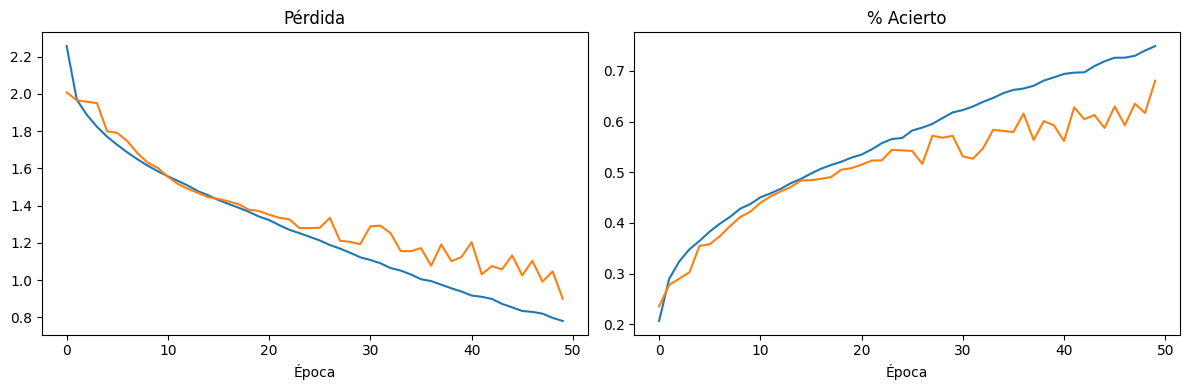

In [142]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_1.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_1.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_1.history['loss'])
plt.plot(h_rmsprop_sigmoid_1.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.3.2. 2 Capas

In [143]:
model_rmsprop_sigmoid_2 = keras.Sequential()
model_rmsprop_sigmoid_2.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_2.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_rmsprop_sigmoid_2.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_2.summary()

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
model_rmsprop_sigmoid_2.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_sigmoid_2 = model_rmsprop_sigmoid_2.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1611 - loss: 2.2996 - val_accuracy: 0.2491 - val_loss: 2.0082
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2703 - loss: 2.0103 - val_accuracy: 0.2783 - val_loss: 1.9478
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3105 - loss: 1.9166 - val_accuracy: 0.2889 - val_loss: 1.9638
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3332 - loss: 1.8574 - val_accuracy: 0.3036 - val_loss: 1.9411
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3516 - loss: 1.8022 - val_accuracy: 0.3177 - val_loss: 1.8993
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3692 - loss: 1.7560 - val_accuracy: 0.3370 - val_loss: 1.8425
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3890 - loss: 1.7133 - val_accuracy: 0.3569 - val_loss: 1.7820
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4032 - loss: 1.6742 - val_accu

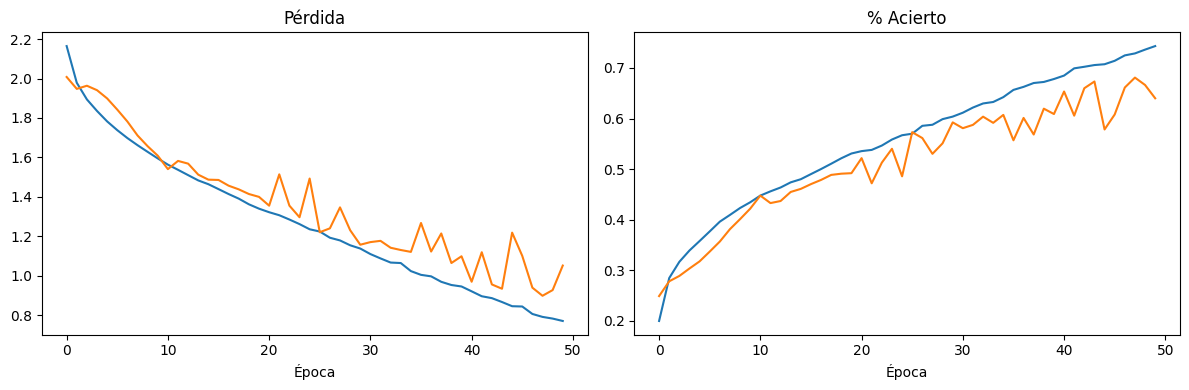

In [145]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_2.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_2.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_2.history['loss'])
plt.plot(h_rmsprop_sigmoid_2.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.1.3.3.3. 3 Capas

In [146]:
model_rmsprop_sigmoid_3 = keras.Sequential()
model_rmsprop_sigmoid_3.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_3.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
model_rmsprop_sigmoid_3.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
model_rmsprop_sigmoid_3.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_3.summary()

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model_rmsprop_sigmoid_3.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001, rho=0.9),
    metrics=['accuracy']
)

h_rmsprop_sigmoid_3 = model_rmsprop_sigmoid_3.fit(X_test, Y_test,
                                      epochs=50,
                                      batch_size=100,
                                      validation_data=(X_test,Y_test))

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1272 - loss: 2.3044 - val_accuracy: 0.1898 - val_loss: 2.0935
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2231 - loss: 2.0891 - val_accuracy: 0.2691 - val_loss: 1.9794
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2631 - loss: 2.0164 - val_accuracy: 0.2733 - val_loss: 1.9434
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2941 - loss: 1.9502 - val_accuracy: 0.2792 - val_loss: 1.9856
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3117 - loss: 1.9032 - val_accuracy: 0.2901 - val_loss: 1.9835
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3250 - loss: 1.8601 - val_accuracy: 0.3043 - val_loss: 1.9465
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3358 - loss: 1.8229 - val_accuracy: 0.3226 - val_loss: 1.9026
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3525 - loss: 1.7859 - val_accu

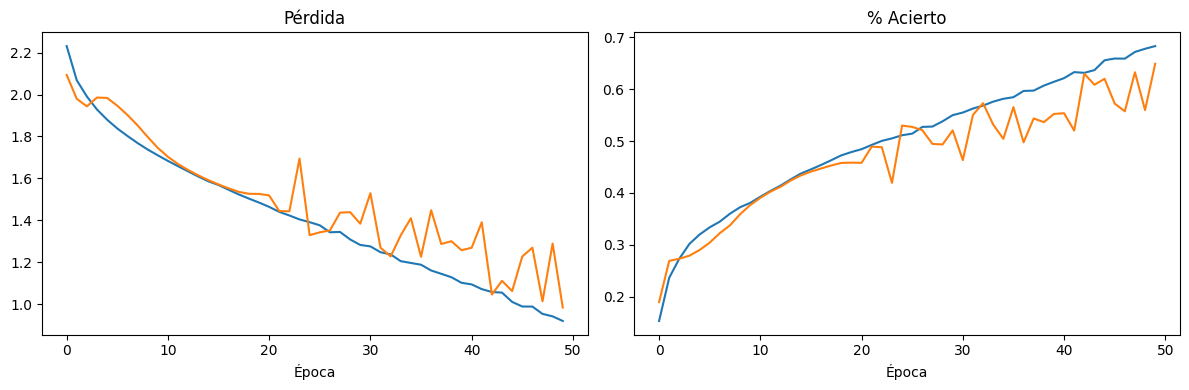

In [148]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_3.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_3.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_3.history['loss'])
plt.plot(h_rmsprop_sigmoid_3.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.1.4 **Conclusiones**

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ __ capas ocultas }& {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\text{ __ capas ocultas } & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

Para completar la tabla en LaTeX seguir los siguientes pasos:

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:

* Ejemplo:\hline \text{ 2 capas ocultas }& {7.2} & {8.0} & {1.3} & {3.5} & {0.8} & {5.1}

Insertar en este espacio las conclusiones que obtuvieron tras cambiar diversos parámetros e hiperparámetros de la red construida. 
Indiquen si hubo cambios significativos en el tiempo de entrenamiento, si impactó la precisión en la clasificación y por qué cambian los tiempos de entrenamiento con una función versus otra.

### 4.2. Backpropagation

Explicar en este apartado qué es backpropagation y cuál es su función en las redes neuronales artificiales.
Cuál es la diferencia que tiene backpropagation con el descenso de gradiente y en qué consiste este último concepto. 

### 4.3. Regularización del modelo

En este apartado, incorporar al modelo construido, técnicas de regularización. Indiquen las diferencias que hay entre las técnicas de regularización y justifiquen que técnica se comportó mejor y por qué. Es importante detallar con qué arquitectura finalmente quedó nuestro modelo para irle incorporando mejoras en los siguientes items. 
Si utilizaron Early stopping, justificar y fundamentar el desempeño obtenido, si no lo utilizaron, indicar y fundamentar por qué no. 

#### 4.3.1. Regularización con DROPOUT

##### 4.3.1.1. Regularización con Dropout de MODELO 1 - SGD

###### 4.3.1.1.1. SGD + ReLu + Droput (3 capas)

In [25]:
# nuestra red feed-forward

model_sgd_relu_dropout = keras.Sequential()
model_sgd_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.5))
model_sgd_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='tercera_capa'))
model_sgd_relu_dropout.add(keras.layers.Dropout(0.3))
model_sgd_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_relu_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#sgd=SGD(learning_rate=0.01)
model_sgd_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

In [27]:
h_model_sgd_relu_dropout = model_sgd_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1365 - loss: 2.3098 - val_accuracy: 0.2630 - val_loss: 2.0676
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2057 - loss: 2.1140 - val_accuracy: 0.3111 - val_loss: 1.9673
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2494 - loss: 2.0292 - val_accuracy: 0.3308 - val_loss: 1.8986
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2708 - loss: 1.9806 - val_accuracy: 0.3460 - val_loss: 1.8555
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2895 - loss: 1.9459 - val_accuracy: 0.3570 - val_loss: 1.8170
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3038 - loss: 1.9122 - val_accuracy: 0.3629 - val_loss: 1.7902
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3106 - loss: 1.8905 - val_accuracy: 0.3759 - val_loss: 1.7629
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3249 - loss: 1.8663 - val_accu

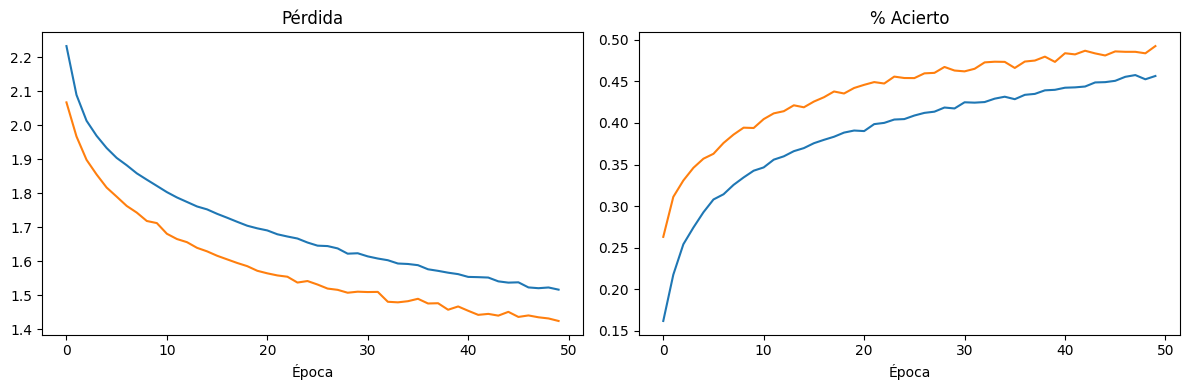

In [28]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_relu_dropout.history['accuracy'])
plt.plot(h_model_sgd_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_relu_dropout.history['loss'])
plt.plot(h_model_sgd_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.1.2. SGD + Tanh + Droput (3 capas)

In [29]:
# nuestra red feed-forward

model_sgd_tanh_dropout = keras.Sequential()
model_sgd_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.5))
model_sgd_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.5))
model_sgd_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='tercera_capa'))
model_sgd_tanh_dropout.add(keras.layers.Dropout(0.3))
model_sgd_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_tanh_dropout.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_sgd_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_model_sgd_tanh_dropout = model_sgd_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1637 - loss: 2.3805 - val_accuracy: 0.3264 - val_loss: 1.8966
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2630 - loss: 2.0555 - val_accuracy: 0.3526 - val_loss: 1.8354
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2912 - loss: 1.9779 - val_accuracy: 0.3607 - val_loss: 1.8114
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3057 - loss: 1.9320 - val_accuracy: 0.3672 - val_loss: 1.7918
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3178 - loss: 1.9071 - val_accuracy: 0.3736 - val_loss: 1.7829
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3230 - loss: 1.8894 - val_accuracy: 0.3813 - val_loss: 1.7681
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3340 - loss: 1.8656 - val_accuracy: 0.3799 - val_loss: 1.7659
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3368 - loss: 1.8562 - val_accu

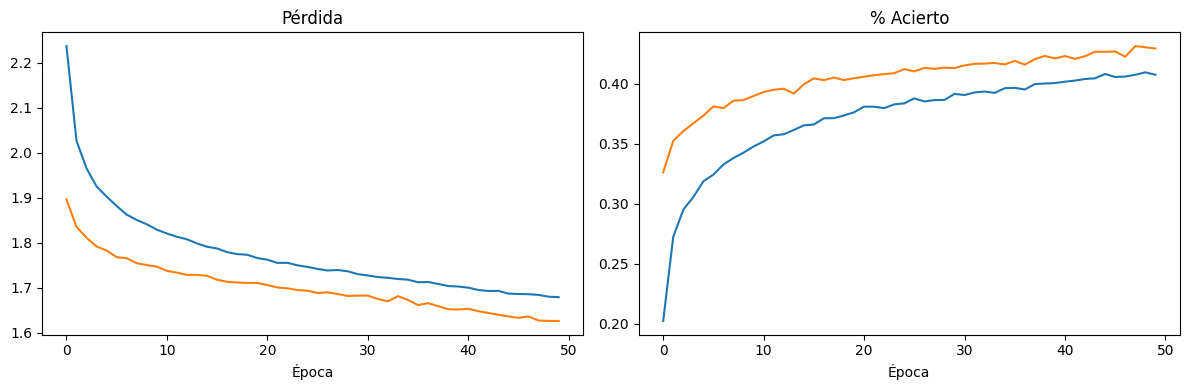

In [31]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_tanh_dropout.history['accuracy'])
plt.plot(h_model_sgd_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_tanh_dropout.history['loss'])
plt.plot(h_model_sgd_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.1.3. SGD + Sigmoid + Droput (1 capa)

In [32]:
# nuestra red feed-forward

model_sgd_sigmoid_dropout = keras.Sequential()
model_sgd_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_sgd_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_sgd_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_sgd_sigmoid_dropout.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_sgd_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_model_sgd_sigmoid_dropout = model_sgd_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1261 - loss: 2.4191 - val_accuracy: 0.2930 - val_loss: 2.0909
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2031 - loss: 2.1692 - val_accuracy: 0.3128 - val_loss: 2.0217
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2441 - loss: 2.0797 - val_accuracy: 0.3255 - val_loss: 1.9782
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2583 - loss: 2.0378 - val_accuracy: 0.3348 - val_loss: 1.9487
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2744 - loss: 2.0092 - val_accuracy: 0.3379 - val_loss: 1.9268
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2825 - loss: 1.9887 - val_accuracy: 0.3435 - val_loss: 1.9098
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2913 - loss: 1.9700 - val_accuracy: 0.3459 - val_loss: 1.8959
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3016 - loss: 1.9520 - val_accura

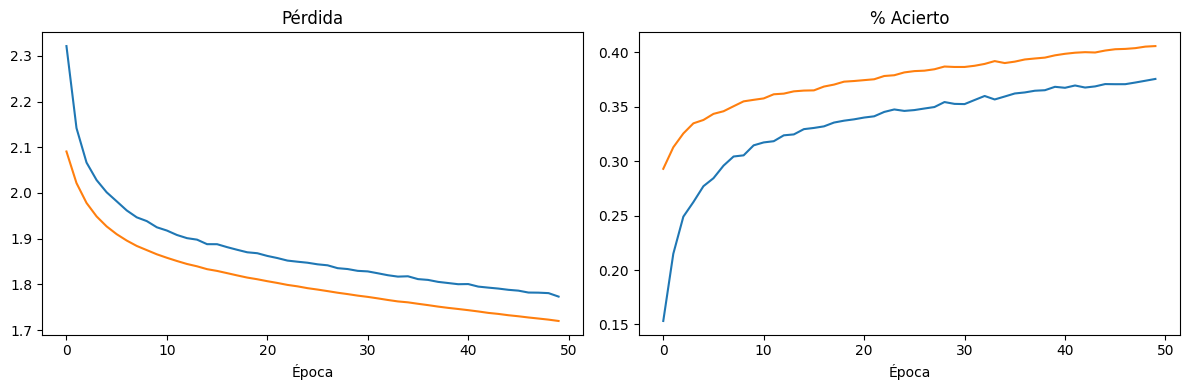

In [34]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_sgd_sigmoid_dropout.history['accuracy'])
plt.plot(h_model_sgd_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_sgd_sigmoid_dropout.history['loss'])
plt.plot(h_model_sgd_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.1.2. Regularización con Dropout de MODELO 2 - ADAM

###### 4.3.2.1. ADAM + ReLu + Dropout (3 capas)

In [14]:
# nuestra red feed-forward

model_adam_relu_dropout = keras.Sequential()
model_adam_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.5))
model_adam_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.5))
model_adam_relu_dropout.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_adam_relu_dropout.add(keras.layers.Dropout(0.3))
model_adam_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_relu_dropout.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#sgd=SGD(learning_rate=0.01)
model_adam_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_model_adam_relu_dropout = model_adam_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50


2024-05-08 20:04:26.531620: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


390/391 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1491 - loss: 2.2906

2024-05-08 20:04:38.318064: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.1493 - loss: 2.2899 - val_accuracy: 0.2502 - val_loss: 2.0323
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2078 - loss: 2.0686 - val_accuracy: 0.2842 - val_loss: 1.9919
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2196 - loss: 2.0393 - val_accuracy: 0.2881 - val_loss: 1.9969
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2322 - loss: 2.0089 - val_accuracy: 0.2685 - val_loss: 1.9996
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2324 - loss: 2.0184 - val_accuracy: 0.2569 - val_loss: 2.0120
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2371 - loss: 2.0051 - val_accuracy: 0.2587 - val_loss: 1.9766
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2396 - loss: 1.9893 - val_accuracy: 0.2693 - val_loss: 1.9890
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.2454 - loss: 1.9881 - val_accuracy:

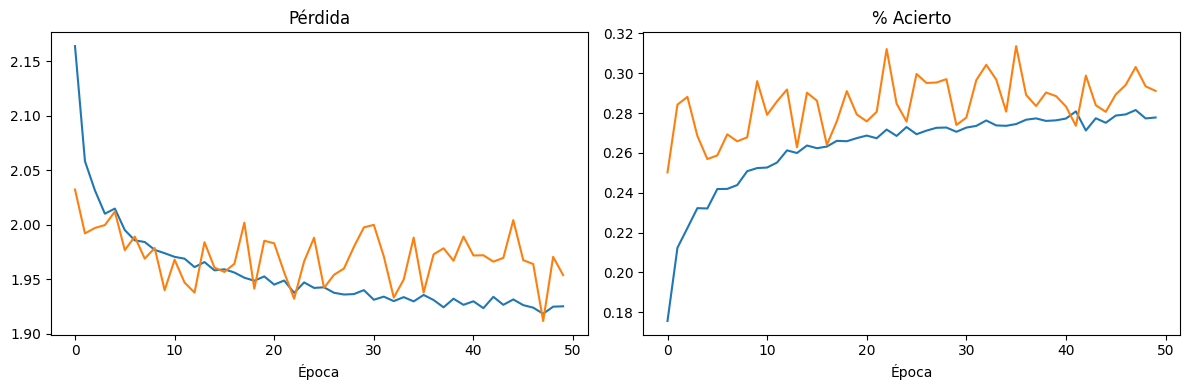

In [16]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_adam_relu_dropout.history['accuracy'])
plt.plot(h_model_adam_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_adam_relu_dropout.history['loss'])
plt.plot(h_model_adam_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2. ADAM + Tanh (1 capa)

In [134]:
# nuestra red feed-forward

model_adam_tanh_dropout = keras.Sequential()
model_adam_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_adam_tanh_dropout.add(keras.layers.Dropout(0.5))
model_adam_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_tanh_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model_adam_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_tanh_dropout = model_adam_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.1641 - loss: 3.0302 - val_accuracy: 0.3068 - val_loss: 1.9068
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.2532 - loss: 2.1037 - val_accuracy: 0.3368 - val_loss: 1.8411
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2945 - loss: 1.9548 - val_accuracy: 0.3561 - val_loss: 1.7921
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3195 - loss: 1.9075 - val_accuracy: 0.3525 - val_loss: 1.7892
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3193 - loss: 1.8933 - val_accuracy: 0.3550 - val_loss: 1.7876
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3254 - loss: 1.8843 - val_accuracy: 0.3649 - val_loss: 1.7696
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3272 - loss: 1.8759 - val_accuracy: 0.3637 - val_loss: 1.7595
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3345 - loss: 1.8584 - val_a

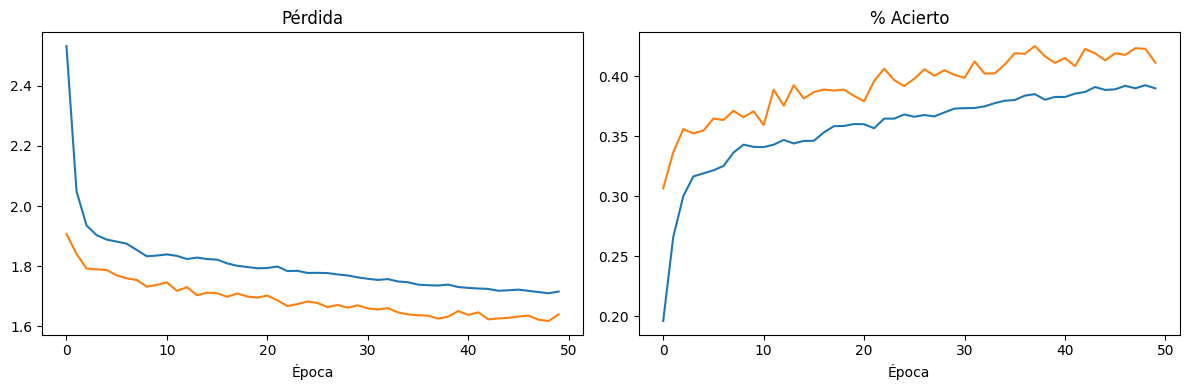

In [136]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_dropout.history['accuracy'])
plt.plot(h_adam_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_dropout.history['loss'])
plt.plot(h_adam_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3. ADAM + Sigmoid (1 capa)

In [137]:
# nuestra red feed-forward

model_adam_sigmoid_dropout = keras.Sequential()
model_adam_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_adam_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_adam_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_adam_sigmoid_dropout.summary()

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [138]:
model_adam_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_sigmoid_dropout = model_adam_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.2252 - loss: 2.1996 - val_accuracy: 0.3576 - val_loss: 1.8077
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3402 - loss: 1.8462 - val_accuracy: 0.3884 - val_loss: 1.7306
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3600 - loss: 1.7956 - val_accuracy: 0.3965 - val_loss: 1.6858
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.3738 - loss: 1.7571 - val_accuracy: 0.4229 - val_loss: 1.6376
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3859 - loss: 1.7266 - val_accuracy: 0.4333 - val_loss: 1.6185
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3933 - loss: 1.6967 - val_accuracy: 0.4274 - val_loss: 1.6114
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3970 - loss: 1.6909 - val_accuracy: 0.4319 - val_loss: 1.5940
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4122 - loss: 1.6656 - va

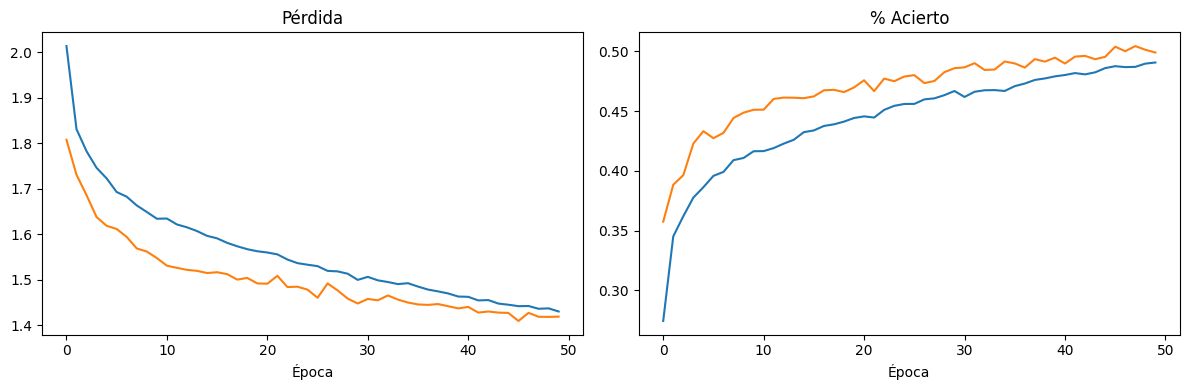

In [139]:
# imprime la pérdida para cada época
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_dropout.history['accuracy'])
plt.plot(h_adam_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_dropout.history['loss'])
plt.plot(h_adam_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.1.3. Regularización con Dropout de MODELO 3 - RMSProp

###### 4.3.1.3.1. SGD + ReLu + RMSProp (3 capas)

In [149]:
model_rmsprop_relu_dropout = keras.Sequential()
model_rmsprop_relu_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
model_rmsprop_relu_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_relu_dropout.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
model_rmsprop_relu_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_relu_dropout.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
model_rmsprop_relu_dropout.add(keras.layers.Dropout(0.3))
model_rmsprop_relu_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_relu_dropout.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
model_rmsprop_relu_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_model_rmsprop_relu_dropout = model_rmsprop_relu_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.1351 - loss: 2.4027 - val_accuracy: 0.2308 - val_loss: 2.0575
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2091 - loss: 2.0896 - val_accuracy: 0.2869 - val_loss: 2.0088
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2252 - loss: 2.0407 - val_accuracy: 0.2244 - val_loss: 2.0333
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2428 - loss: 2.0115 - val_accuracy: 0.2734 - val_loss: 1.9847
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2491 - loss: 1.9908 - val_accuracy: 0.2808 - val_loss: 1.9786
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2563 - loss: 1.9790 - val_accuracy: 0.2998 - val_loss: 1.9968
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.2657 - loss: 1.9687 - val_accuracy: 0.2854 - val_loss: 1.9782
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2710 - loss: 1.9579 - val_acc

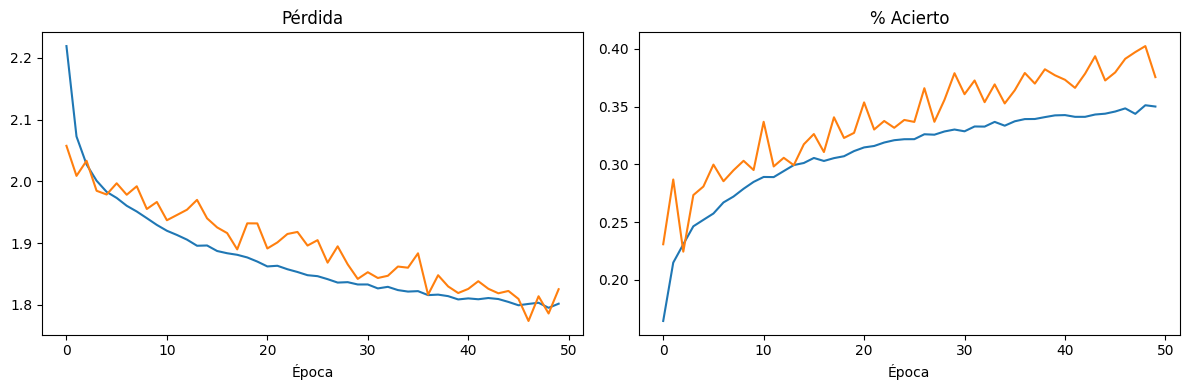

In [151]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_rmsprop_relu_dropout.history['accuracy'])
plt.plot(h_model_rmsprop_relu_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_rmsprop_relu_dropout.history['loss'])
plt.plot(h_model_rmsprop_relu_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.3.2 SGD + Tanh + RMSProp (3 capas)

In [152]:
model_rmsprop_tanh_dropout = keras.Sequential()
model_rmsprop_tanh_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
model_rmsprop_tanh_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_tanh_dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
model_rmsprop_tanh_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_tanh_dropout.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
model_rmsprop_tanh_dropout.add(keras.layers.Dropout(0.3))
model_rmsprop_tanh_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_tanh_dropout.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [153]:
model_rmsprop_tanh_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_model_rmsprop_tanh_dropout = model_rmsprop_tanh_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.1269 - loss: 2.5313 - val_accuracy: 0.2238 - val_loss: 2.0477
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.1980 - loss: 2.1530 - val_accuracy: 0.2673 - val_loss: 1.9671
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2448 - loss: 2.0323 - val_accuracy: 0.2824 - val_loss: 1.9595
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2723 - loss: 1.9739 - val_accuracy: 0.3091 - val_loss: 1.8686
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2886 - loss: 1.9474 - val_accuracy: 0.3275 - val_loss: 1.8516
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.2981 - loss: 1.9253 - val_accuracy: 0.3484 - val_loss: 1.8432
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3078 - loss: 1.9094 - val_accuracy: 0.3547 - val_loss: 1.8137
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3182 - loss: 1.8896 - val_acc

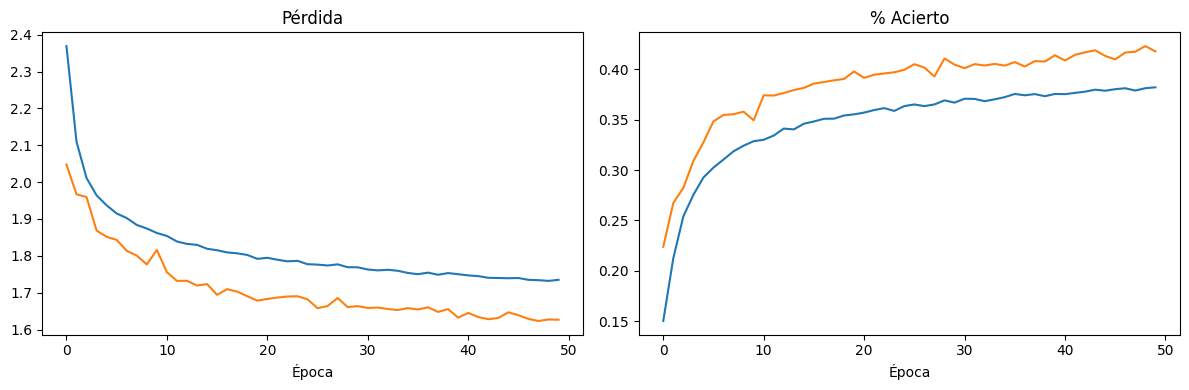

In [154]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_rmsprop_tanh_dropout.history['accuracy'])
plt.plot(h_model_rmsprop_tanh_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_rmsprop_tanh_dropout.history['loss'])
plt.plot(h_model_rmsprop_tanh_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.1.3.3. SGD + Sigmoid + RMSProp (1 capa)

In [155]:
model_rmsprop_sigmoid_dropout = keras.Sequential()
model_rmsprop_sigmoid_dropout.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
model_rmsprop_sigmoid_dropout.add(keras.layers.Dropout(0.5))
model_rmsprop_sigmoid_dropout.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

model_rmsprop_sigmoid_dropout.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model_rmsprop_sigmoid_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_model_rmsprop_sigmoid_dropout = model_rmsprop_sigmoid_dropout.fit(X_train, Y_train,
        epochs=50,
        batch_size=128,
        validation_data=(X_test,Y_test)
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2277 - loss: 2.2086 - val_accuracy: 0.3346 - val_loss: 1.8536
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3371 - loss: 1.8532 - val_accuracy: 0.3817 - val_loss: 1.7406
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3670 - loss: 1.7746 - val_accuracy: 0.4139 - val_loss: 1.6648
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3869 - loss: 1.7229 - val_accuracy: 0.4225 - val_loss: 1.6177
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3997 - loss: 1.6881 - val_accuracy: 0.4391 - val_loss: 1.5838
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4100 - loss: 1.6655 - val_accuracy: 0.4422 - val_loss: 1.5672
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4226 - loss: 1.6368 - val_accuracy: 0.4560 - val_loss: 1.5467
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4286 - loss: 1.6203 - val_accu

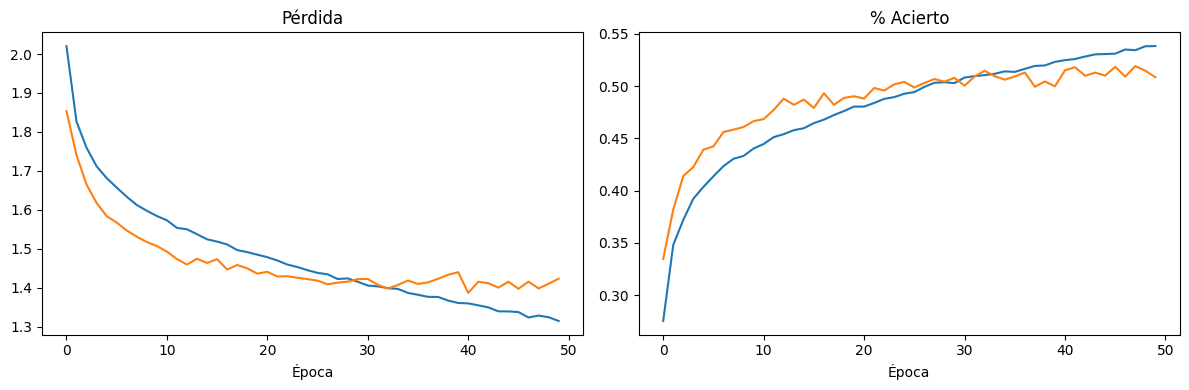

In [157]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_model_rmsprop_sigmoid_dropout.history['accuracy'])
plt.plot(h_model_rmsprop_sigmoid_dropout.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_model_rmsprop_sigmoid_dropout.history['loss'])
plt.plot(h_model_rmsprop_sigmoid_dropout.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

#### 4.3.2 Regularización con EarlyStopping

##### 4.3.2.1. Regularización con EarlyStopping de MODELO 1 - SGD + EarlyStopping

In [158]:
# Definir el regularizador de EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

###### 4.3.2.1.1. SGD + ReLu + Earlystopping (3 capas)

In [159]:
model_sgd_relu_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'),
    keras.layers.Dense(h2, activation='relu', name='segunda_capa'),
    keras.layers.Dense(h3, activation='relu', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_sgd_relu_earlystopping.summary()

/home/cris/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [160]:
model_sgd_relu_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_relu_earlystopping = model_sgd_relu_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2310 - loss: 2.1260 - val_accuracy: 0.3435 - val_loss: 1.8633
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3495 - loss: 1.8486 - val_accuracy: 0.3811 - val_loss: 1.7642
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3828 - loss: 1.7646 - val_accuracy: 0.4026 - val_loss: 1.7061
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4010 - loss: 1.7099 - val_accuracy: 0.4124 - val_loss: 1.6605
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4164 - loss: 1.6665 - val_accuracy: 0.4256 - val_loss: 1.6260
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4286 - loss: 1.6302 - val_accuracy: 0.4363 - val_loss: 1.5988
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4397 - loss: 1.5988 - val_accuracy: 0.4460 - val_loss: 1.5756
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4471 - loss: 1.5713 - val_accu

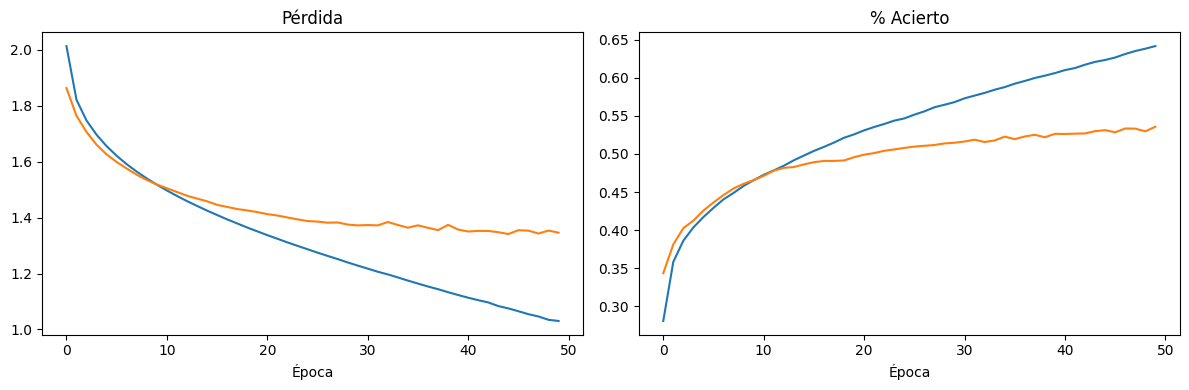

In [161]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_relu_earlystopping.history['accuracy'])
plt.plot(h_sgd_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_relu_earlystopping.history['loss'])
plt.plot(h_sgd_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.1.2. SGD + Tanh + Earlystopping (3 capas)

In [162]:
model_sgd_tanh_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'),
    keras.layers.Dense(h2, activation='tanh', name='segunda_capa'),
    keras.layers.Dense(h3, activation='tanh', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_sgd_tanh_earlystopping.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
model_sgd_tanh_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_tanh_earlystopping = model_sgd_tanh_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]  # Agregar EarlyStopping como callback
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2566 - loss: 2.0596 - val_accuracy: 0.3589 - val_loss: 1.8169
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3629 - loss: 1.8116 - val_accuracy: 0.3898 - val_loss: 1.7483
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3872 - loss: 1.7512 - val_accuracy: 0.4072 - val_loss: 1.7046
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4027 - loss: 1.7083 - val_accuracy: 0.4190 - val_loss: 1.6699
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4171 - loss: 1.6724 - val_accuracy: 0.4278 - val_loss: 1.6412
Epoch 5: early stopping


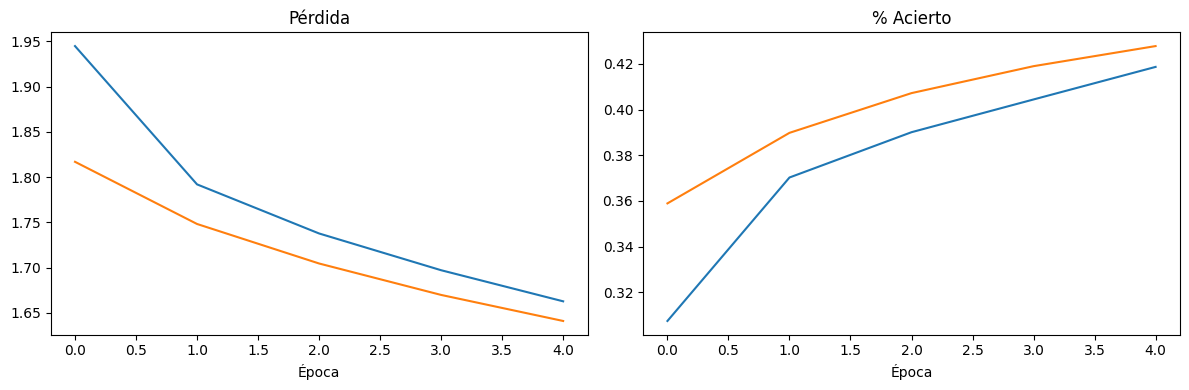

In [164]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_tanh_earlystopping.history['accuracy'])
plt.plot(h_sgd_tanh_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_tanh_earlystopping.history['loss'])
plt.plot(h_sgd_tanh_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.1.3. SGD + Sigmoid + Earlystopping (1 capa)

In [165]:
model_sgd_sigmoid_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_sgd_sigmoid_earlystopping.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [166]:
model_sgd_sigmoid_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h_sgd_sigmoid_earlystopping = model_sgd_sigmoid_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.1665 - loss: 2.2552 - val_accuracy: 0.2881 - val_loss: 2.0813
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2962 - loss: 2.0570 - val_accuracy: 0.3178 - val_loss: 1.9888
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3230 - loss: 1.9774 - val_accuracy: 0.3338 - val_loss: 1.9351
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3382 - loss: 1.9290 - val_accuracy: 0.3450 - val_loss: 1.9002
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3473 - loss: 1.8967 - val_accuracy: 0.3504 - val_loss: 1.8757
Epoch 5: early stopping


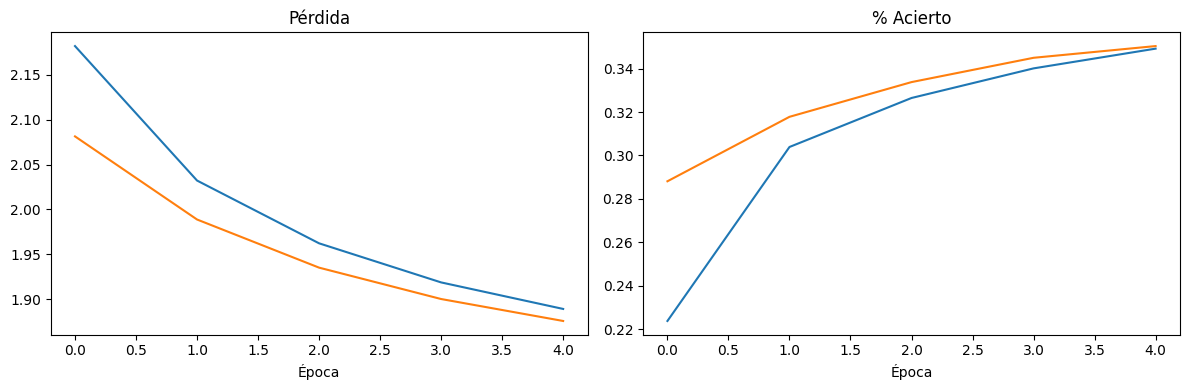

In [167]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_sgd_sigmoid_earlystopping.history['accuracy'])
plt.plot(h_sgd_sigmoid_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_sgd_sigmoid_earlystopping.history['loss'])
plt.plot(h_sgd_sigmoid_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.2.2. Regularización con EarlyStopping de MODELO 2 - ADAM + EarlyStopping

###### 4.3.2.2.1. ADAM + ReLu + Earlystopping (3 capas)

In [168]:
model_adam_relu_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'),
    keras.layers.Dense(h2, activation='relu', name='segunda_capa'),
    keras.layers.Dense(h3, activation='relu', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_adam_relu_earlystopping.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model_adam_relu_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_relu_earlystopping = model_adam_relu_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.2674 - loss: 2.0246 - val_accuracy: 0.3918 - val_loss: 1.6921
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.3933 - loss: 1.6989 - val_accuracy: 0.4151 - val_loss: 1.6217
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.4243 - loss: 1.6076 - val_accuracy: 0.4404 - val_loss: 1.5433
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.4449 - loss: 1.5392 - val_accuracy: 0.4586 - val_loss: 1.5168
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.4620 - loss: 1.4975 - val_accuracy: 0.4621 - val_loss: 1.5093
Epoch 5: early stopping


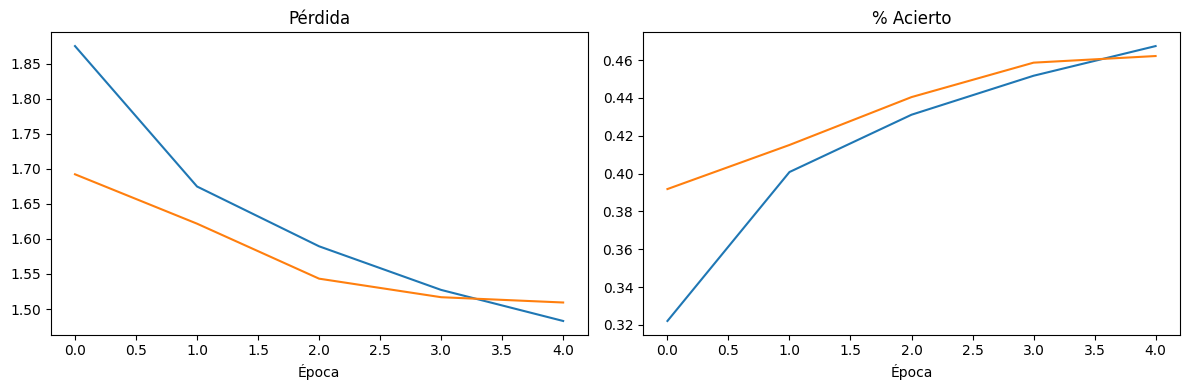

In [188]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_relu_earlystopping.history['accuracy'])
plt.plot(h_adam_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_relu_earlystopping.history['loss'])
plt.plot(h_adam_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2.2. ADAM + Tanh + Earlystopping (1 capa)

In [171]:
model_adam_tanh_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_adam_tanh_earlystopping.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
model_adam_tanh_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_tanh_earlystopping = model_adam_tanh_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2427 - loss: 2.4926 - val_accuracy: 0.3464 - val_loss: 1.8059
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3563 - loss: 1.8031 - val_accuracy: 0.3702 - val_loss: 1.7408
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3817 - loss: 1.7390 - val_accuracy: 0.3773 - val_loss: 1.7257
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3967 - loss: 1.6954 - val_accuracy: 0.3950 - val_loss: 1.6733
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4096 - loss: 1.6627 - val_accuracy: 0.4064 - val_loss: 1.6590
Epoch 5: early stopping


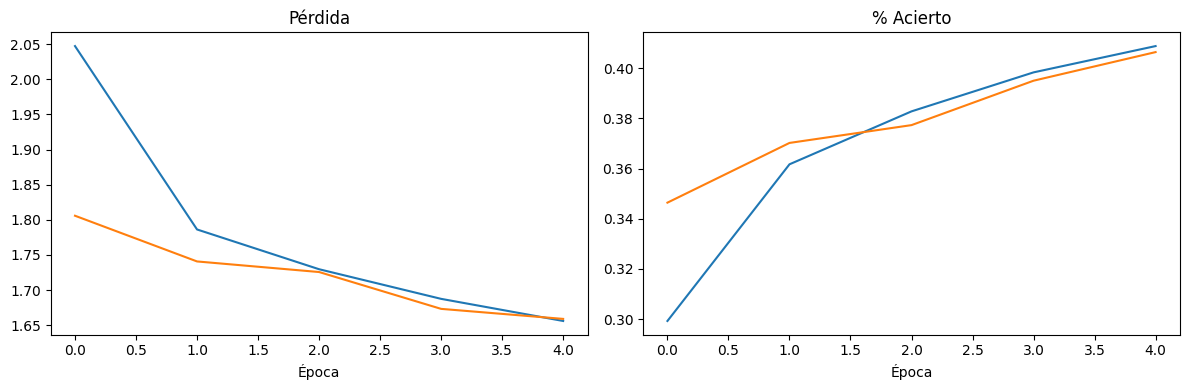

In [189]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_tanh_earlystopping.history['accuracy'])
plt.plot(h_adam_tanh_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_tanh_earlystopping.history['loss'])
plt.plot(h_adam_tanh_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.2.3. ADAM + Sigmoid + Earlystopping (1 capa)

In [174]:
model_adam_sigmoid_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_adam_sigmoid_earlystopping.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [175]:
model_adam_sigmoid_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h_adam_sigmoid_earlystopping = model_adam_sigmoid_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.2758 - loss: 2.0662 - val_accuracy: 0.3700 - val_loss: 1.7571
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3900 - loss: 1.7344 - val_accuracy: 0.4068 - val_loss: 1.6608
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4203 - loss: 1.6429 - val_accuracy: 0.4297 - val_loss: 1.6084
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4409 - loss: 1.5852 - val_accuracy: 0.4372 - val_loss: 1.5739
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4522 - loss: 1.5431 - val_accuracy: 0.4447 - val_loss: 1.5496
Epoch 5: early stopping


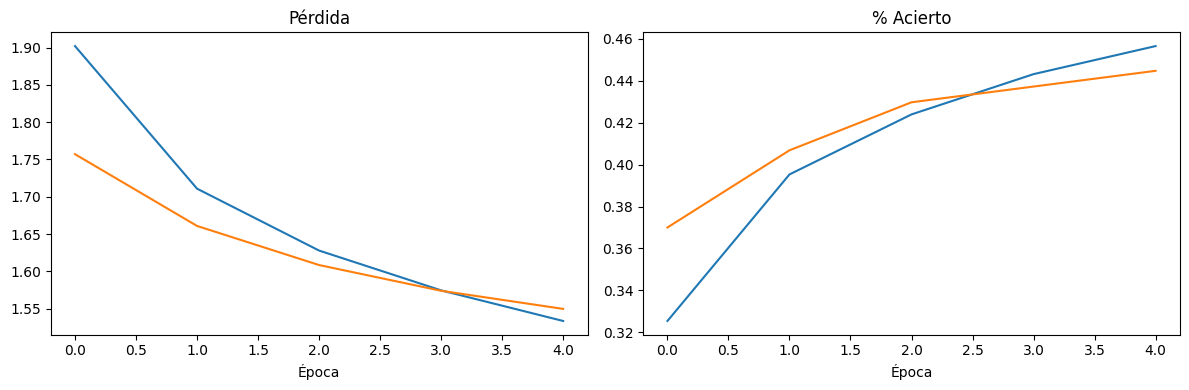

In [176]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_adam_sigmoid_earlystopping.history['accuracy'])
plt.plot(h_adam_sigmoid_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_adam_sigmoid_earlystopping.history['loss'])
plt.plot(h_adam_sigmoid_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

##### 4.3.2.3. Regularización con EarlyStopping de MODELO 2 - RMSProp

###### 4.3.2.3.1. RMSProp + ReLu + Earlystopping (3 capas)

In [177]:
model_rmsprop_relu_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'),
    keras.layers.Dense(h2, activation='relu', name='segunda_capa'),
    keras.layers.Dense(h3, activation='relu', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_rmsprop_relu_earlystopping.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [178]:
model_rmsprop_relu_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_rmsprop_relu_earlystopping = model_rmsprop_relu_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.2003 - loss: 2.4225 - val_accuracy: 0.3377 - val_loss: 1.8218
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3450 - loss: 1.8197 - val_accuracy: 0.3873 - val_loss: 1.6952
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3870 - loss: 1.7099 - val_accuracy: 0.3801 - val_loss: 1.7464
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4140 - loss: 1.6328 - val_accuracy: 0.4326 - val_loss: 1.5773
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4364 - loss: 1.5700 - val_accuracy: 0.4463 - val_loss: 1.5485
Epoch 5: early stopping


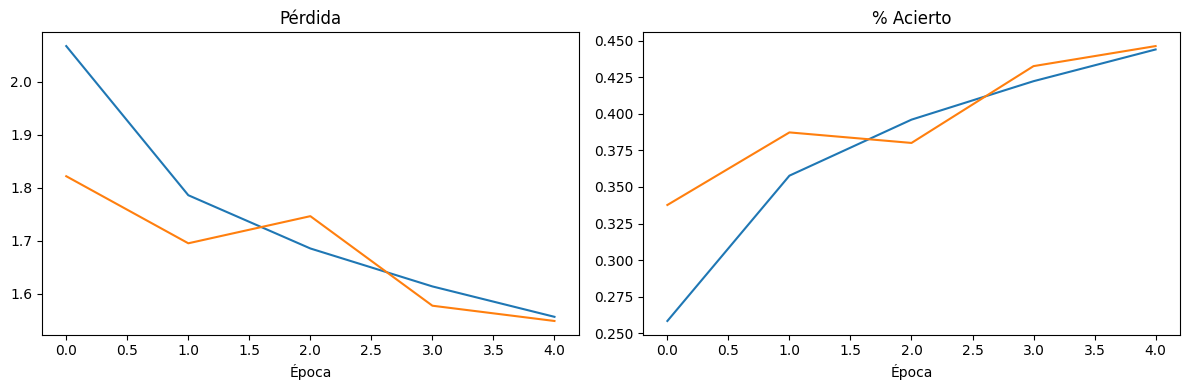

In [179]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_relu_earlystopping.history['accuracy'])
plt.plot(h_rmsprop_relu_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_relu_earlystopping.history['loss'])
plt.plot(h_rmsprop_relu_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3.2. RMSProp + Tanh + Earlystopping (3 capas)

In [180]:
model_rmsprop_tanh_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'),
    keras.layers.Dense(h2, activation='tanh', name='segunda_capa'),
    keras.layers.Dense(h3, activation='tanh', name='tercera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_rmsprop_tanh_earlystopping.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [181]:
model_rmsprop_tanh_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_rmsprop_tanh_earlystopping = model_rmsprop_tanh_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1456 - loss: 2.3352 - val_accuracy: 0.2916 - val_loss: 1.9352
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.2852 - loss: 1.9696 - val_accuracy: 0.3345 - val_loss: 1.8548
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3313 - loss: 1.8600 - val_accuracy: 0.3675 - val_loss: 1.7348
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3540 - loss: 1.7911 - val_accuracy: 0.3673 - val_loss: 1.7346
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.3706 - loss: 1.7445 - val_accuracy: 0.4017 - val_loss: 1.6727
Epoch 5: early stopping


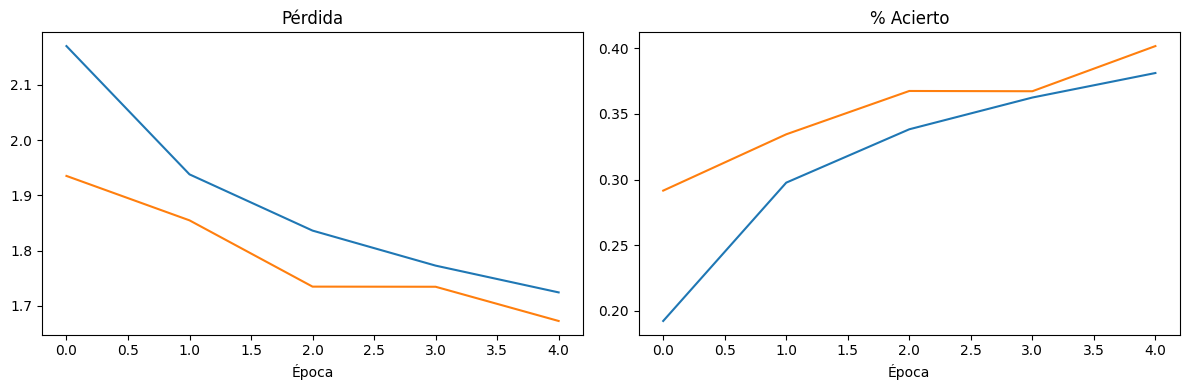

In [182]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_tanh_earlystopping.history['accuracy'])
plt.plot(h_rmsprop_tanh_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_tanh_earlystopping.history['loss'])
plt.plot(h_rmsprop_tanh_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

###### 4.3.2.3.3. RMSProp + Sigmoid + Earlystopping (1 capa)

In [183]:
model_rmsprop_sigmoid_earlystopping = keras.Sequential([
    keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'),
    keras.layers.Dense(C, activation='softmax', name='capa_de_output')
])

model_rmsprop_sigmoid_earlystopping.summary()

Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_output (Dense)          │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [184]:
model_rmsprop_sigmoid_earlystopping.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h_rmsprop_sigmoid_earlystopping = model_rmsprop_sigmoid_earlystopping.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test,Y_test),
    callbacks=[es]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2376 - loss: 2.2504 - val_accuracy: 0.3390 - val_loss: 1.8582
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3533 - loss: 1.8065 - val_accuracy: 0.3940 - val_loss: 1.7093
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3934 - loss: 1.7055 - val_accuracy: 0.4184 - val_loss: 1.6298
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4171 - loss: 1.6386 - val_accuracy: 0.4383 - val_loss: 1.5895
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4354 - loss: 1.5872 - val_accuracy: 0.4495 - val_loss: 1.5526
Epoch 5: early stopping


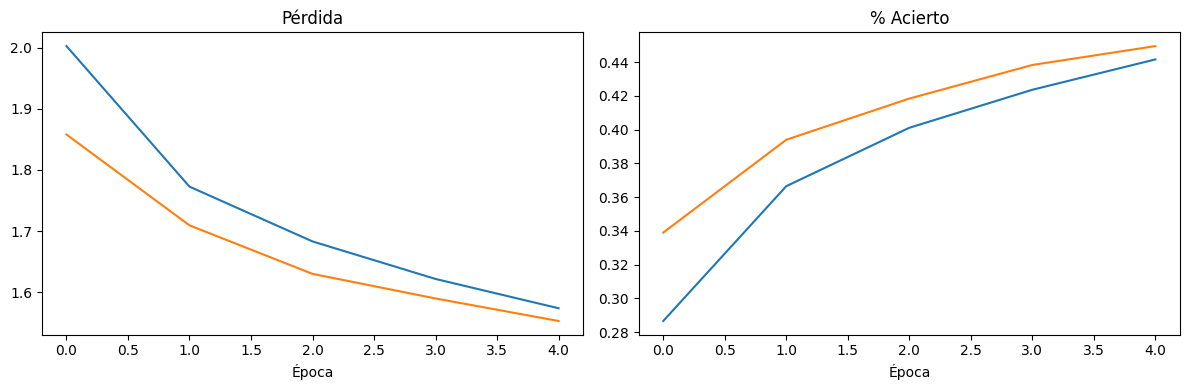

In [185]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(h_rmsprop_sigmoid_earlystopping.history['accuracy'])
plt.plot(h_rmsprop_sigmoid_earlystopping.history['val_accuracy'])
plt.title('% Acierto')
plt.xlabel('Época')

plt.subplot(1, 2, 1)
plt.plot(h_rmsprop_sigmoid_earlystopping.history['loss'])
plt.plot(h_rmsprop_sigmoid_earlystopping.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Época')

plt.tight_layout()
plt.show()

Justificar y hacer análisis aquí.

### 5. EVALUATION

#### 5.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP)

##### 5.1.1. SGD

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val-acc }\hspace{10mm}  { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } \\
\hline \text{ 1 capa oculta }& \text{54,35} & \text{3} & \text{50,59} & \text{x} & {39,63} & \text{x} \\
\text{ 2 capas ocultas } & \text{56,19} & \text{asdf} & \text{53,66} & \text{asdf} & \text{32,32} & \text{x} \\
\text{ 3 capas ocultas } & \text{57,46} & \text{asdf} & \text{54,33} & \text{asdf} & \text{20,43} & \text{x} \\
\hline
\end{array}
\end{aligned}
$$

##### 5.1.2. ADAM

$$
\begin{aligned}
& \hspace{20mm} \text  {Tabla 1.1. Métricas de Rendimiento en red FeedForward Fully Connected (MLP) }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val-acc }\hspace{10mm}  { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } & \text { val-acc }\hspace{10mm} { tiempo-s } \\
\hline \text{ 1 capa oculta }& {54,56} & {} & {} & {} & {} & {} \\
\text{ 2 capas ocultas } & {} & {} & {} & {} & {} & {} \\
\text{ 3 capas ocultas } & {} & {} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

### 5.2. Optimizadores y Normalización 

En este apartado utilizar y fundamentar los diferentes optimizadores, cuál se desempeñó mejor, la arquitectura de red que seleccionaron para trabajar. 
Registrar en la siguiente tabla los valores correspondientes a la mejor ejecución obtenida. 

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Otro* } \\
\hline \hline \text {    } & \text {  } & \text { val-acc }\hspace{10mm} \text { Loss } & \text { val-acc }\hspace{10mm} \text{ Loss } & \text { val-acc }\hspace{10mm} \text { Loss } & \text { val-acc }\hspace{10mm} \text { Loss }\\
\hline \text{ 3 capas } & \text { 50 epocas} & {} & {} & {} & {} & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$

*Especificar el nombre del optimizador

Fundamentar la importancia que tienen las funciones de optimización, en qué influye escoger el optimizador adecuado para el modelo basándose en el desempeño y en la tasa de aprendizaje fija versus una adaptativa.